In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Compressed/Border_Crossing_Entry_Data.csv')
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [3]:
df.shape

(355511, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB


In [5]:
df.describe()

,Port Code,Value
count,355511.000000,3.555110e+05
mean,2454.009921,2.844758e+04
std,1201.900231,1.518807e+05
min,101.000000,0.000000e+00
25%,2304.000000,0.000000e+00
50%,3013.000000,1.000000e+02
75%,3402.000000,2.597500e+03
max,4105.000000,4.447374e+06


In [6]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Port Code,2.0,0.493997,0.715597,-0.012007,0.240995,0.493997,0.746998,1.0
Value,2.0,0.493997,0.715597,-0.012007,0.240995,0.493997,0.746998,1.0


In [7]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

<AxesSubplot:>

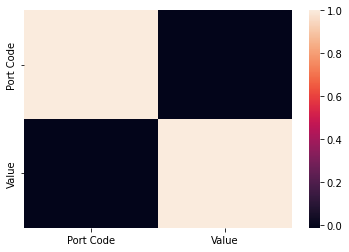

In [8]:
sns.heatmap(df.corr())

In [9]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [10]:
df['Port Name'].value_counts()

Eastport                  5753
Nogales                   3480
Sweetgrass                3480
Sumas                     3480
Champlain-Rouses Point    3480
                          ... 
Bar Harbor                1068
Boquillas                  261
Algonac                     33
Cross Border Xpress         29
Toledo-Sandusky             10
Name: Port Name, Length: 116, dtype: int64

In [11]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [12]:
##Fetaure Engineering Process
df['Day']=df['Date'].str.split('/').str[0]
df['Month']=df['Date'].str.split('/').str[1]
df['Year']=df['Date'].str.split('/').str[2]

In [13]:
df['Year'].value_counts()

2010 00:00    16200
2005 00:00    16128
2006 00:00    16128
2008 00:00    16056
2007 00:00    16056
2009 00:00    16056
2004 00:00    15984
2015 00:00    15984
2011 00:00    15840
2012 00:00    15840
2013 00:00    15840
2014 00:00    15840
2003 00:00    15588
2001 00:00    14832
2000 00:00    14832
1999 00:00    14832
1998 00:00    14832
1997 00:00    14832
1996 00:00    14832
2002 00:00    14832
2016 00:00    13754
2017 00:00     9717
2019 00:00     9593
2018 00:00     9534
2020 00:00     1549
Name: Year, dtype: int64

In [14]:
df['Year']=df['Year'].str.split(' ').str[0]

In [15]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Day,Month,Year
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414,2,1,2020
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763,2,1,2020
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412,2,1,2020
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122,2,1,2020
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545,2,1,2020


In [16]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
 7   Day        355511 non-null  int32 
 8   Month      355511 non-null  int32 
 9   Year       355511 non-null  int32 
dtypes: int32(3), int64(2), object(5)
memory usage: 23.1+ MB


In [18]:
df.drop(['Date'],axis='columns',inplace=True)

In [19]:
df.head()

,Port Name,State,Port Code,Border,Measure,Value,Day,Month,Year
0,Alcan,AK,3104,US-Canada Border,Personal Vehicle Passengers,1414,2,1,2020
1,Alcan,AK,3104,US-Canada Border,Personal Vehicles,763,2,1,2020
2,Alcan,AK,3104,US-Canada Border,Truck Containers Empty,412,2,1,2020
3,Alcan,AK,3104,US-Canada Border,Truck Containers Full,122,2,1,2020
4,Alcan,AK,3104,US-Canada Border,Trucks,545,2,1,2020


In [20]:
df['Border'].value_counts()

US-Canada Border    272838
US-Mexico Border     82673
Name: Border, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [22]:
df['Border']=labelencoder.fit_transform(df['Border'])

In [23]:
df.head()

,Port Name,State,Port Code,Border,Measure,Value,Day,Month,Year
0,Alcan,AK,3104,0,Personal Vehicle Passengers,1414,2,1,2020
1,Alcan,AK,3104,0,Personal Vehicles,763,2,1,2020
2,Alcan,AK,3104,0,Truck Containers Empty,412,2,1,2020
3,Alcan,AK,3104,0,Truck Containers Full,122,2,1,2020
4,Alcan,AK,3104,0,Trucks,545,2,1,2020


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  int32 
 4   Measure    355511 non-null  object
 5   Value      355511 non-null  int64 
 6   Day        355511 non-null  int32 
 7   Month      355511 non-null  int32 
 8   Year       355511 non-null  int32 
dtypes: int32(4), int64(2), object(3)
memory usage: 19.0+ MB


In [25]:
df['Port Name'].value_counts()

Eastport                  5753
Nogales                   3480
Sweetgrass                3480
Sumas                     3480
Champlain-Rouses Point    3480
                          ... 
Bar Harbor                1068
Boquillas                  261
Algonac                     33
Cross Border Xpress         29
Toledo-Sandusky             10
Name: Port Name, Length: 116, dtype: int64

In [26]:
df['State'].value_counts()

ND    58290
WA    45836
ME    39108
MT    38930
TX    36758
MN    23693
NY    21323
AZ    19747
CA    19553
VT    16727
AK    11787
MI    10372
ID     6762
NM     6615
OH       10
Name: State, dtype: int64

In [27]:
df.head()

,Port Name,State,Port Code,Border,Measure,Value,Day,Month,Year
0,Alcan,AK,3104,0,Personal Vehicle Passengers,1414,2,1,2020
1,Alcan,AK,3104,0,Personal Vehicles,763,2,1,2020
2,Alcan,AK,3104,0,Truck Containers Empty,412,2,1,2020
3,Alcan,AK,3104,0,Truck Containers Full,122,2,1,2020
4,Alcan,AK,3104,0,Trucks,545,2,1,2020


<AxesSubplot:>

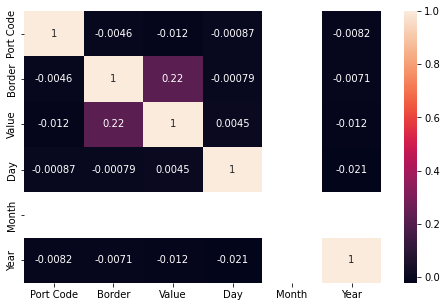

In [28]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True)

In [29]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Port Name" is
 Eastport                  5753
Nogales                   3480
Sweetgrass                3480
Sumas                     3480
Champlain-Rouses Point    3480
                          ... 
Bar Harbor                1068
Boquillas                  261
Algonac                     33
Cross Border Xpress         29
Toledo-Sandusky             10
Name: Port Name, Length: 116, dtype: int64
-------------------------------------------------
unique values in column "State" is
 ND    58290
WA    45836
ME    39108
MT    38930
TX    36758
MN    23693
NY    21323
AZ    19747
CA    19553
VT    16727
AK    11787
MI    10372
ID     6762
NM     6615
OH       10
Name: State, dtype: int64
-------------------------------------------------
unique values in column "Port Code" is
 712     3480
2604    3480
3009    3480
2507    3480
3403    3480
        ... 
112     1068
2410     261
3814      33
2582      29
4105      10
Name: Port Code, Length: 117, dtype: int64
--------

In [30]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [31]:
object_col

['Port Name', 'State', 'Measure']

In [32]:
num_col

['Port Code', 'Border', 'Value', 'Day', 'Month', 'Year']

In [33]:
df.min()

Port Name             Alcan
State                    AK
Port Code               101
Border                    0
Measure      Bus Passengers
Value                     0
Day                       1
Month                     1
Year                   1996
dtype: object

In [34]:
df.max()

Port Name    Willow Creek
State                  WA
Port Code            4105
Border                  1
Measure            Trucks
Value             4447374
Day                    12
Month                   1
Year                 2020
dtype: object

In [35]:
df.mode()

,Port Name,State,Port Code,Border,Measure,Value,Day,Month,Year
0,Eastport,ND,115,0.0,Personal Vehicles,0.0,2.0,1.0,2010.0
1,NaN,NaN,712,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,901,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2507,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2604,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3009,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,3310,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3403,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.skew()

C:\Users\SR COMPUTER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Port Code    -1.067018
Border        1.266188
Value        11.020976
Day           0.013918
Month         0.000000
Year          0.023028
dtype: float64

In [38]:
df.dtypes

Port Name    object
State        object
Port Code     int64
Border        int32
Measure      object
Value         int64
Day           int32
Month         int32
Year          int32
dtype: object

In [39]:
import dtale
dtale.show(df)

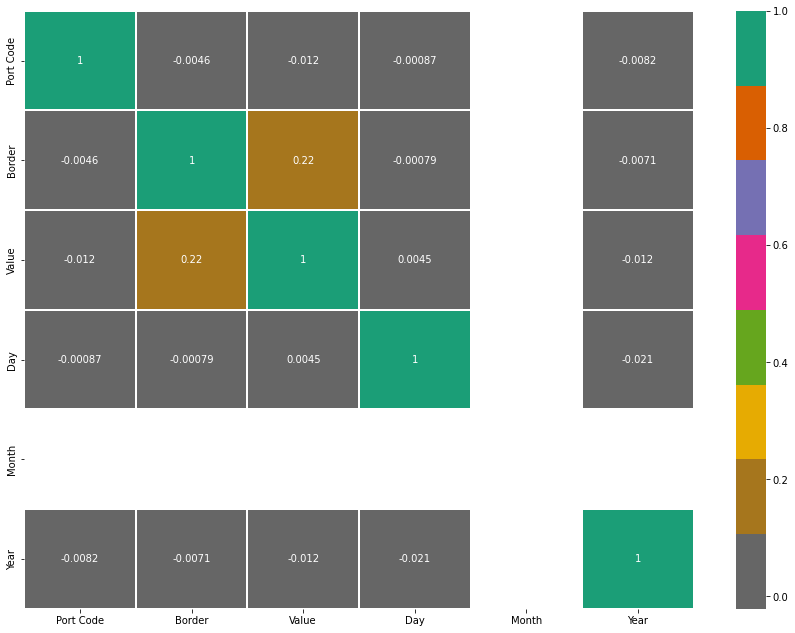

In [40]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [42]:
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year'],
      dtype='object')

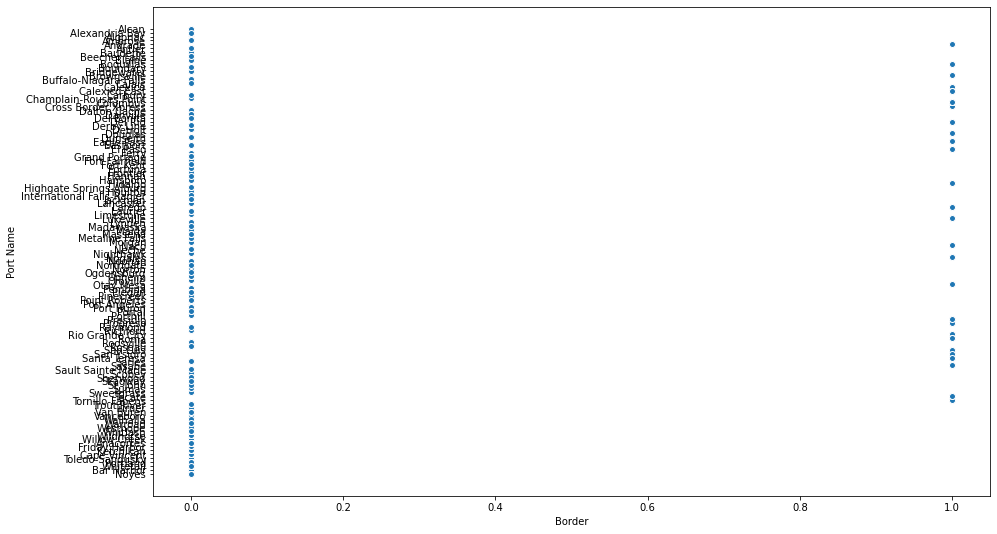

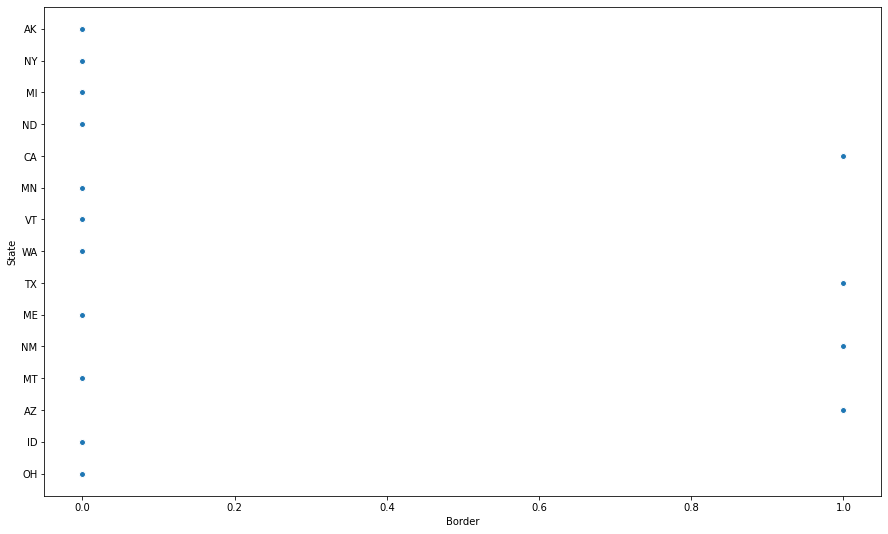

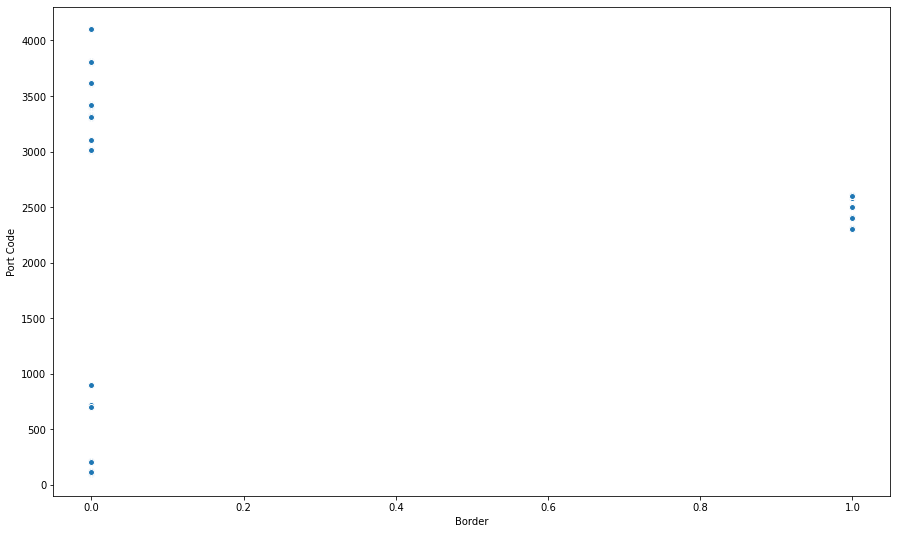

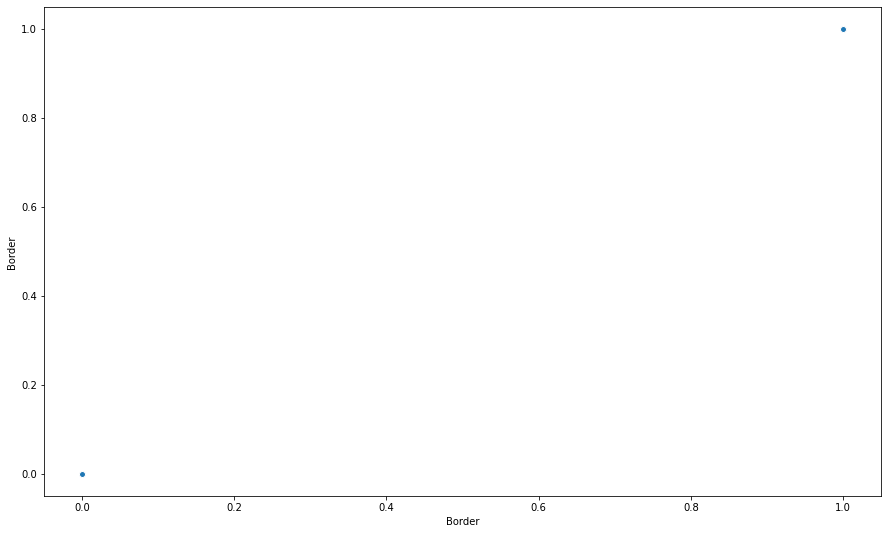

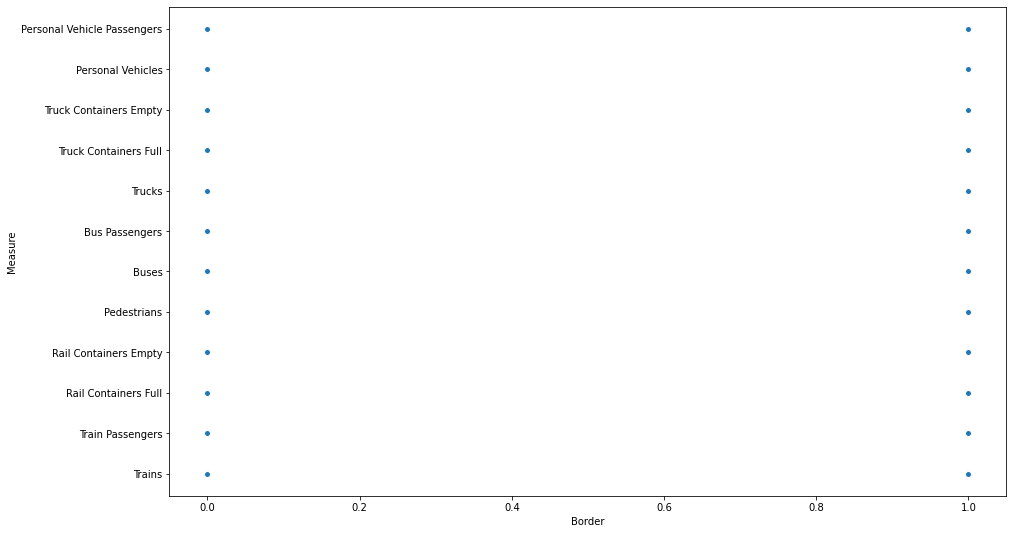

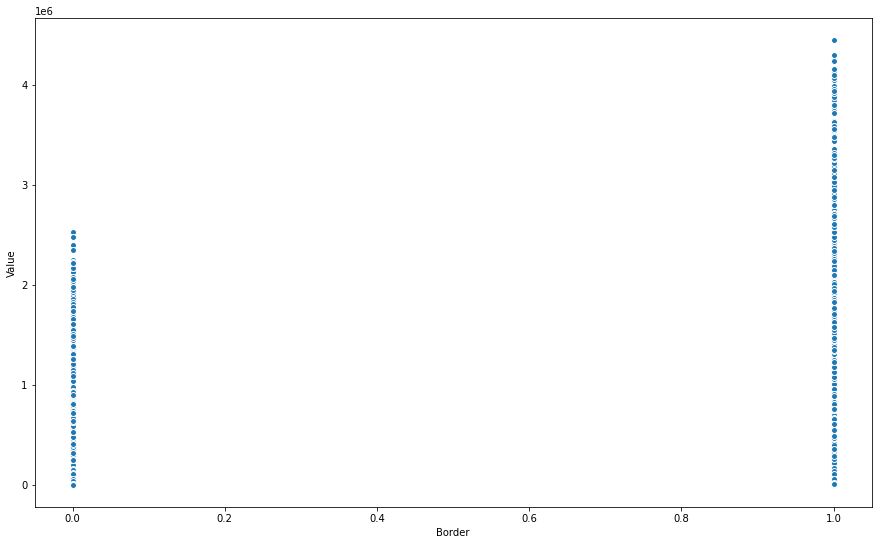

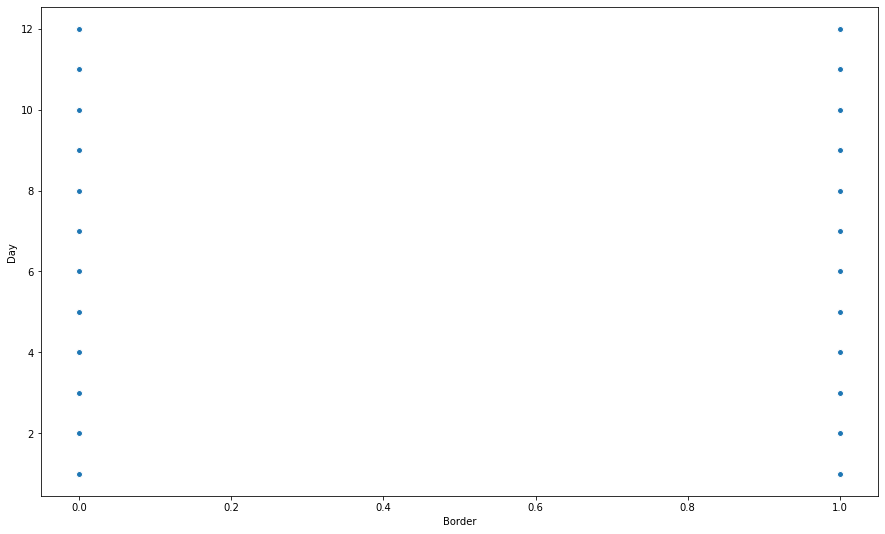

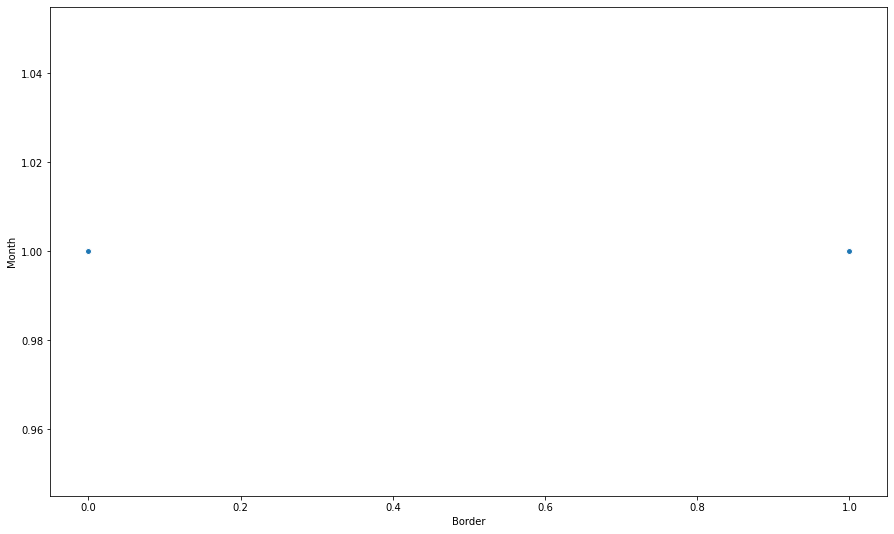

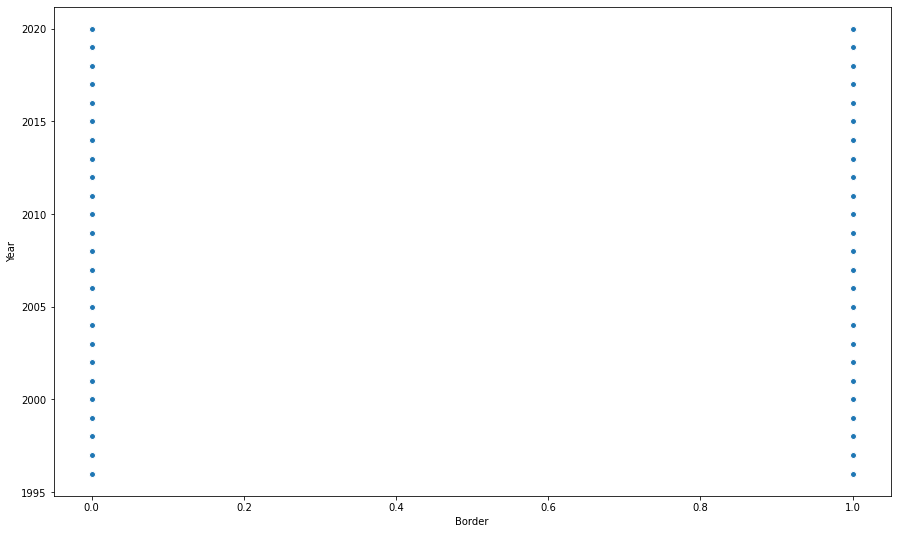

In [44]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

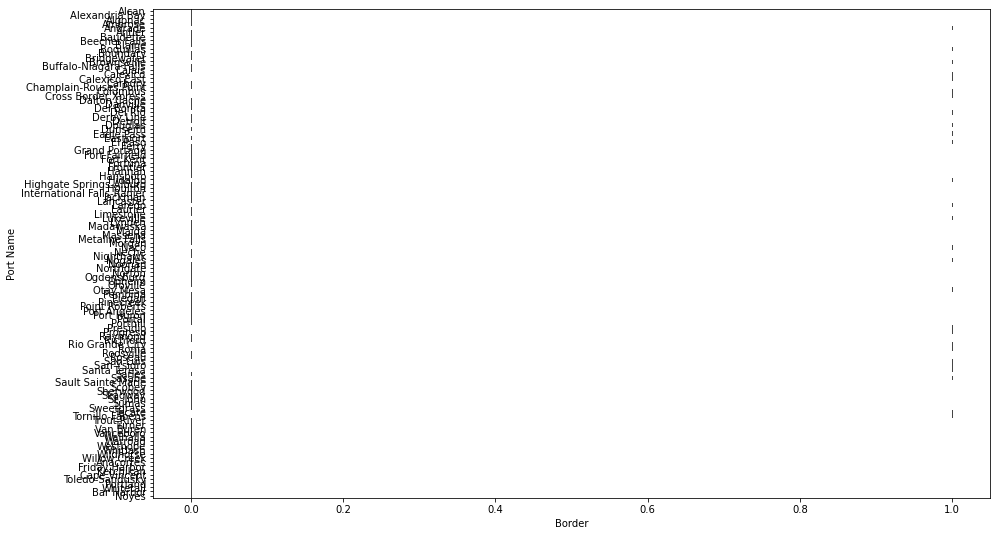

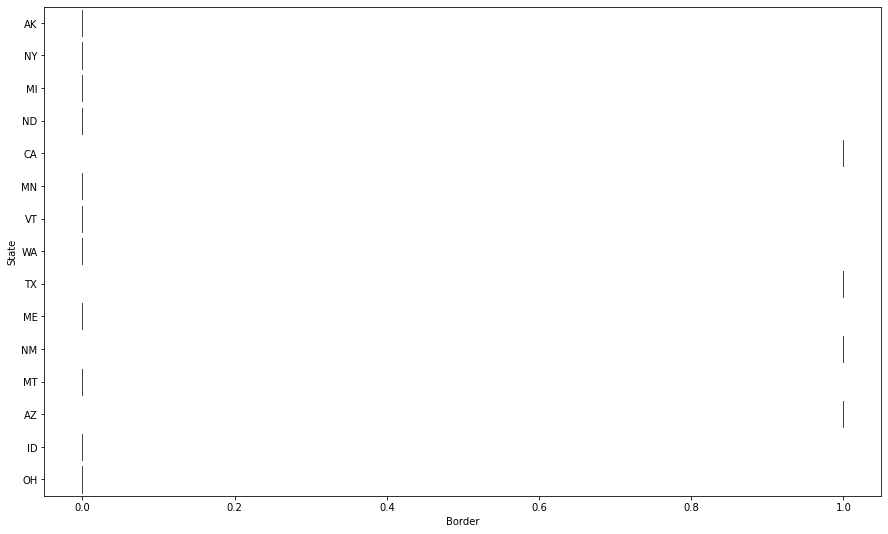

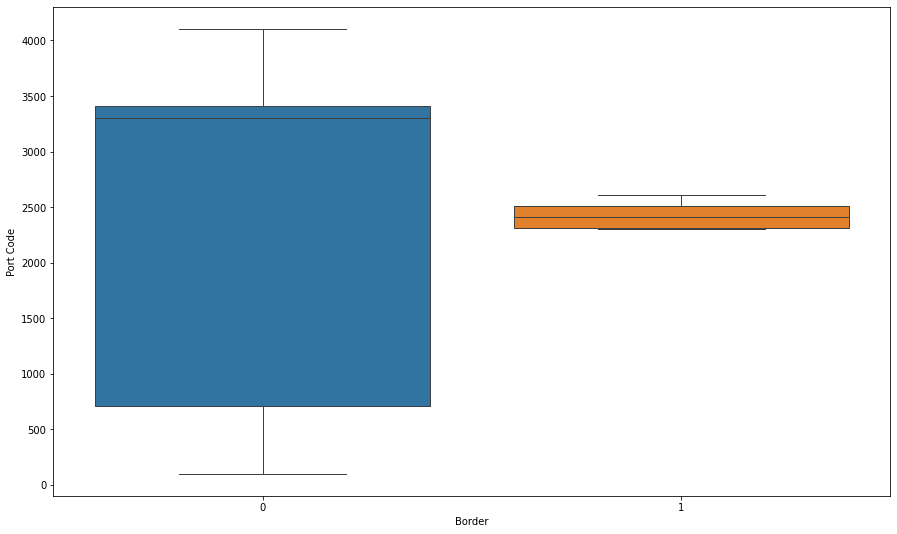

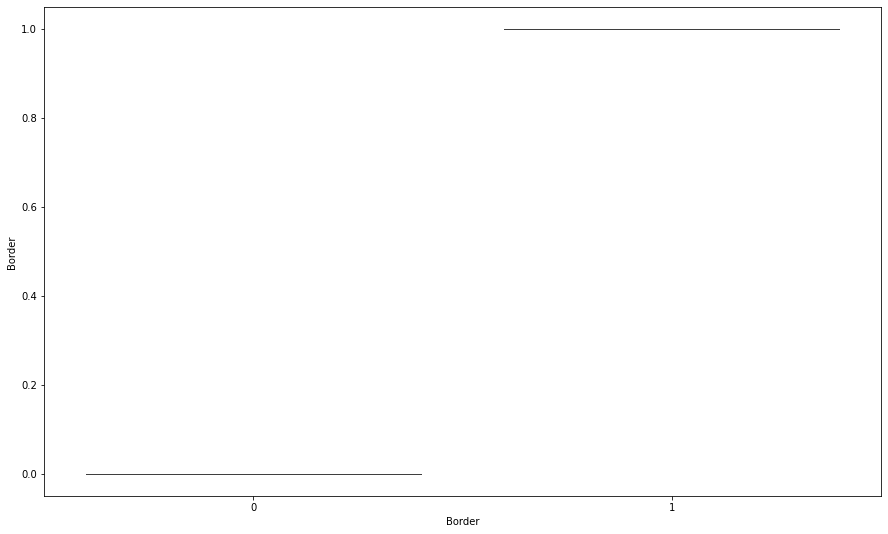

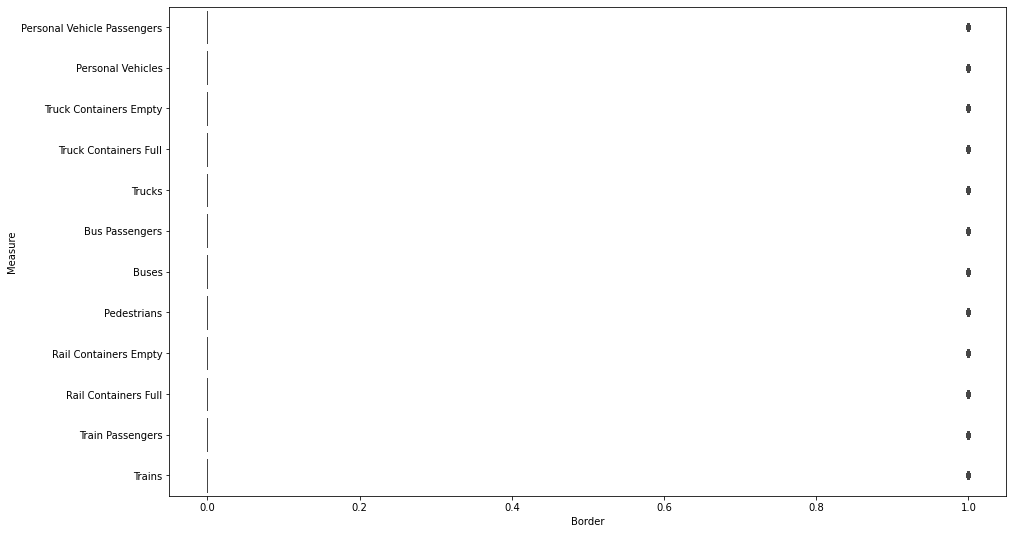

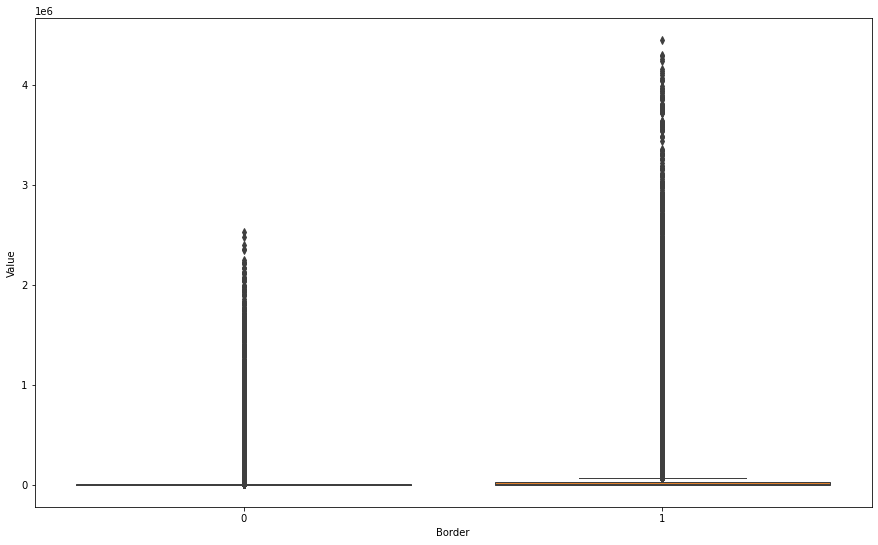

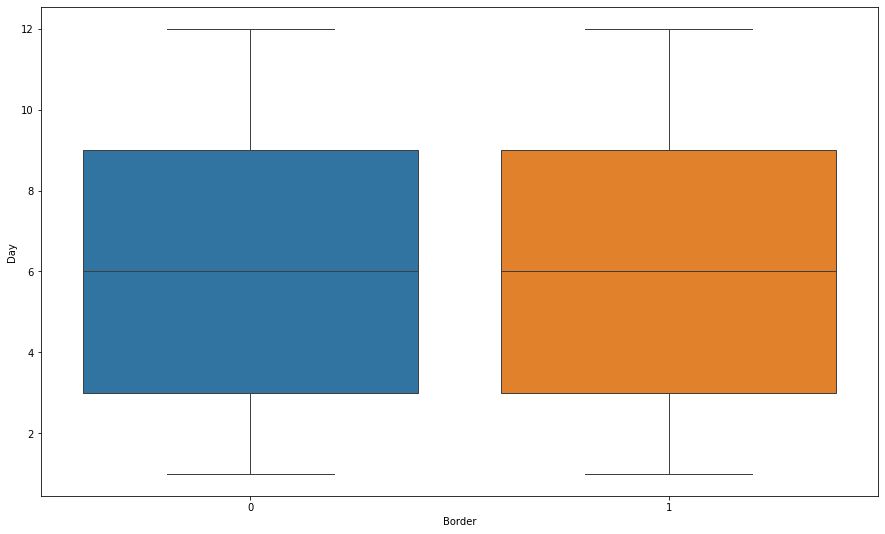

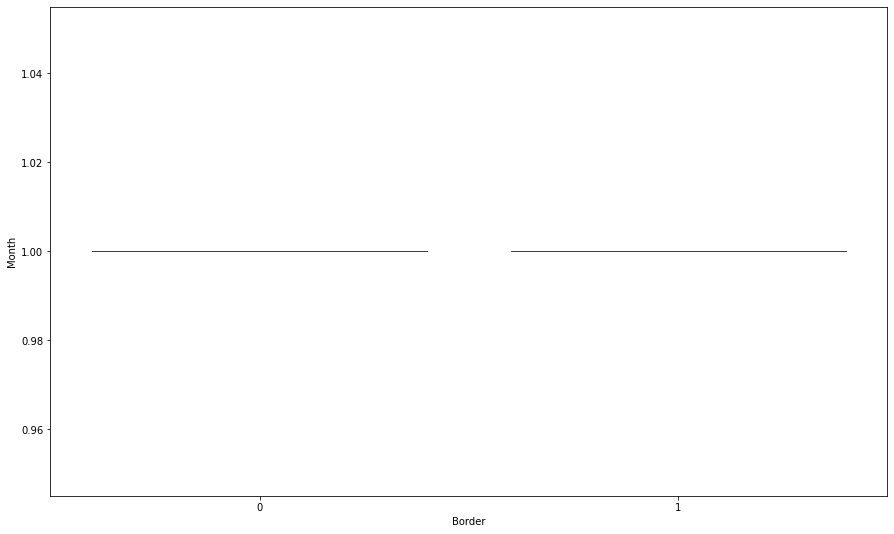

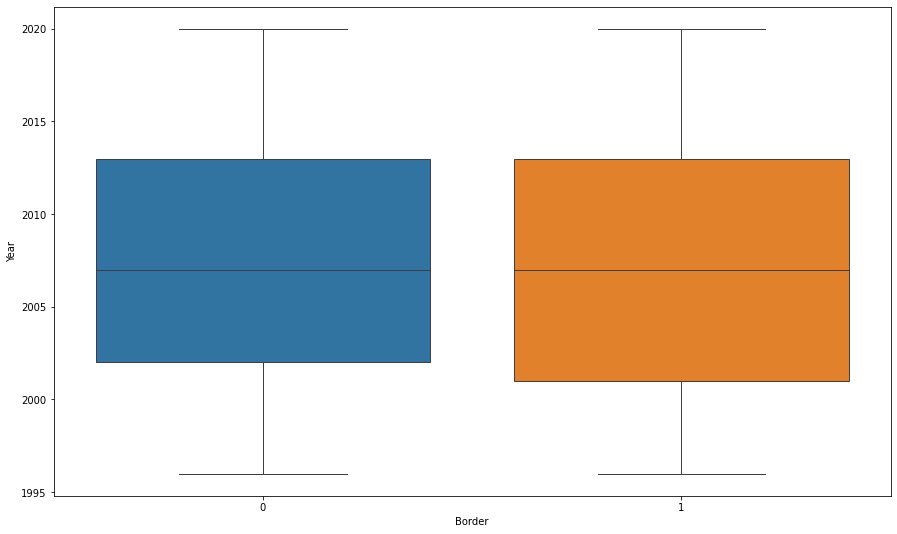

In [45]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

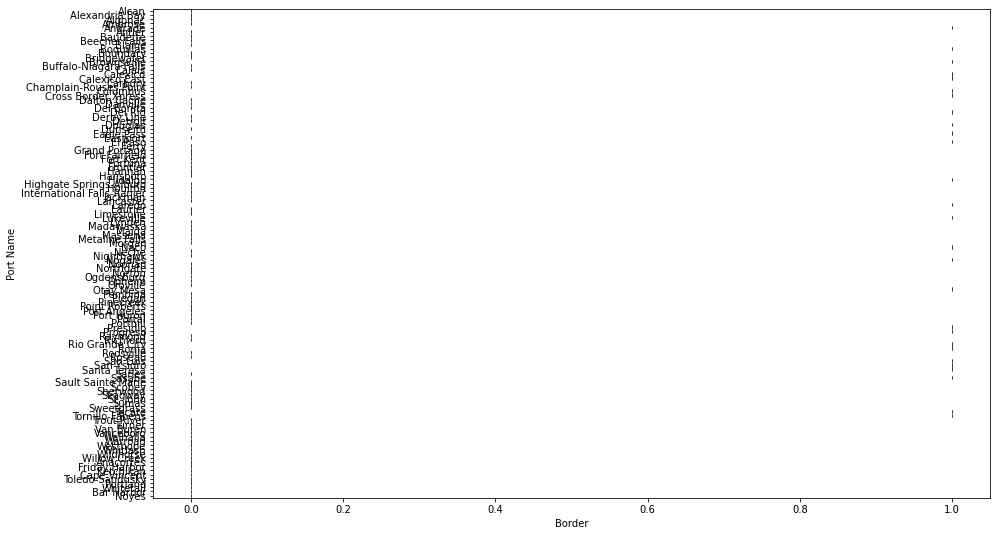

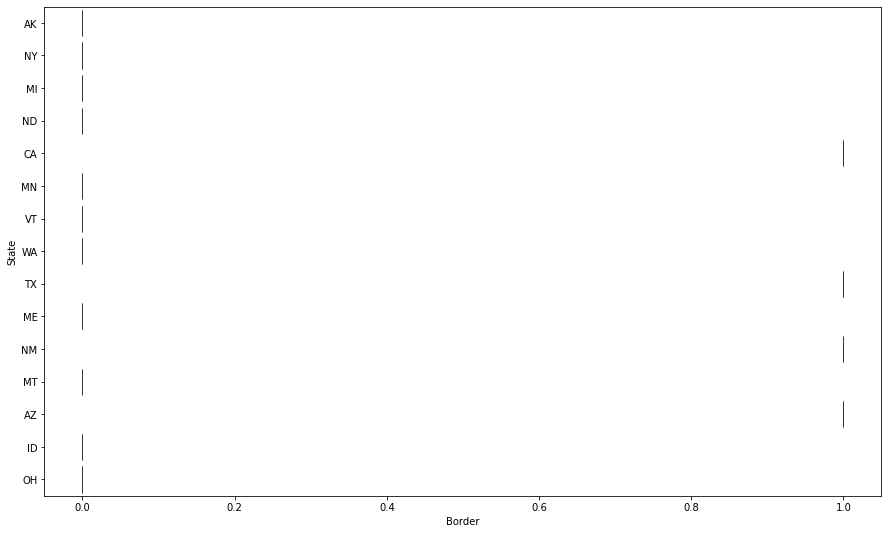

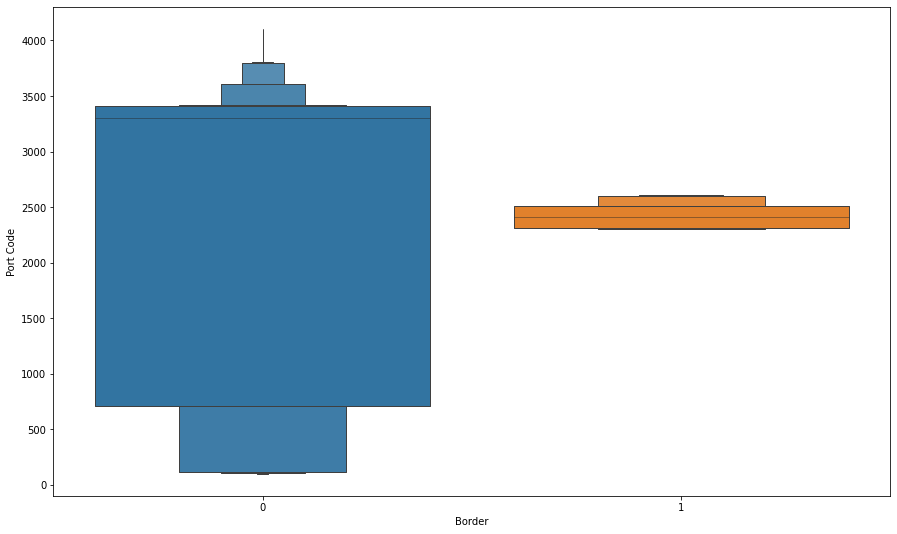

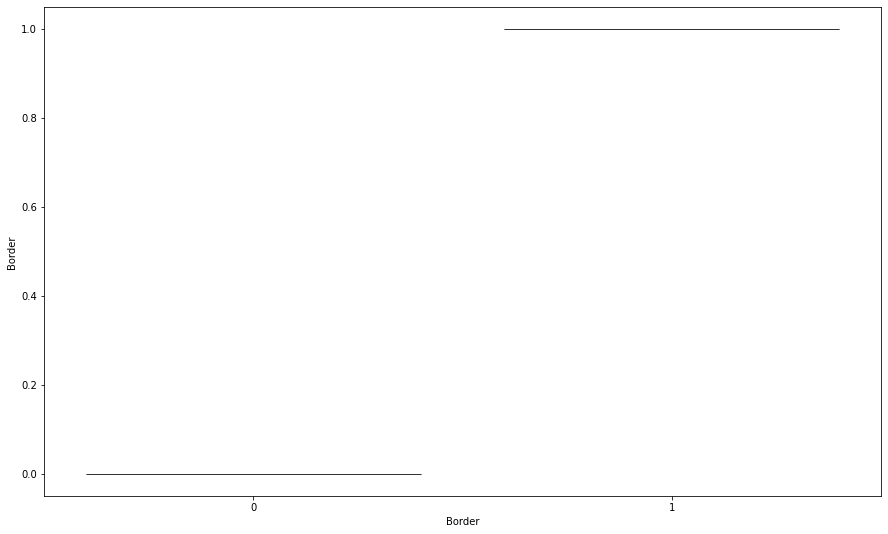

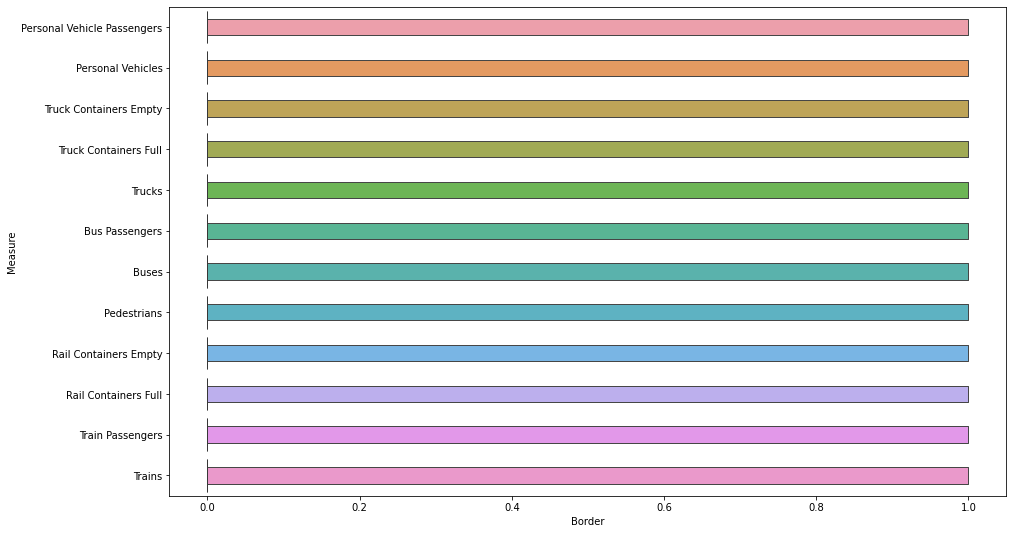

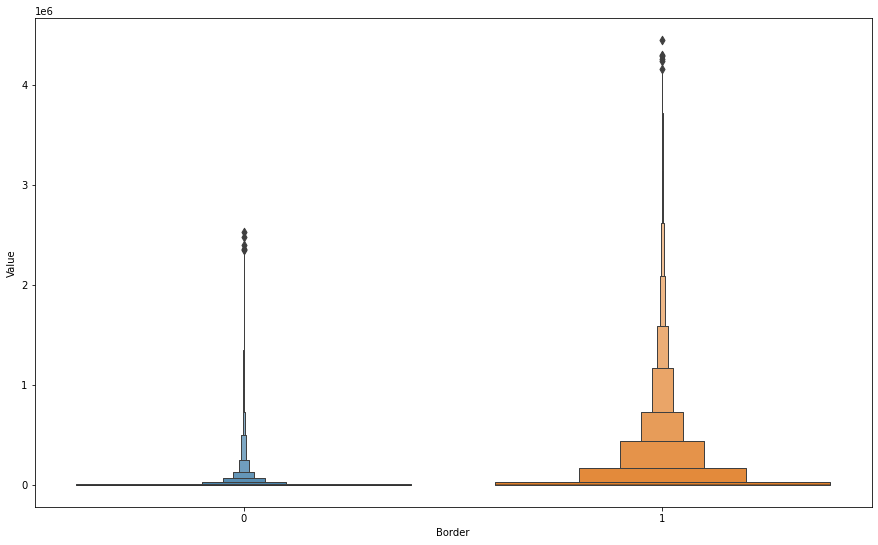

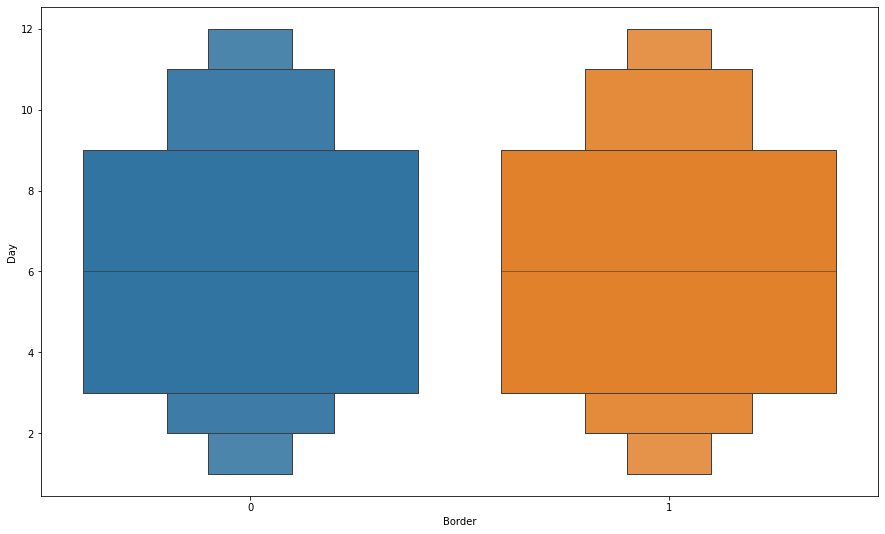

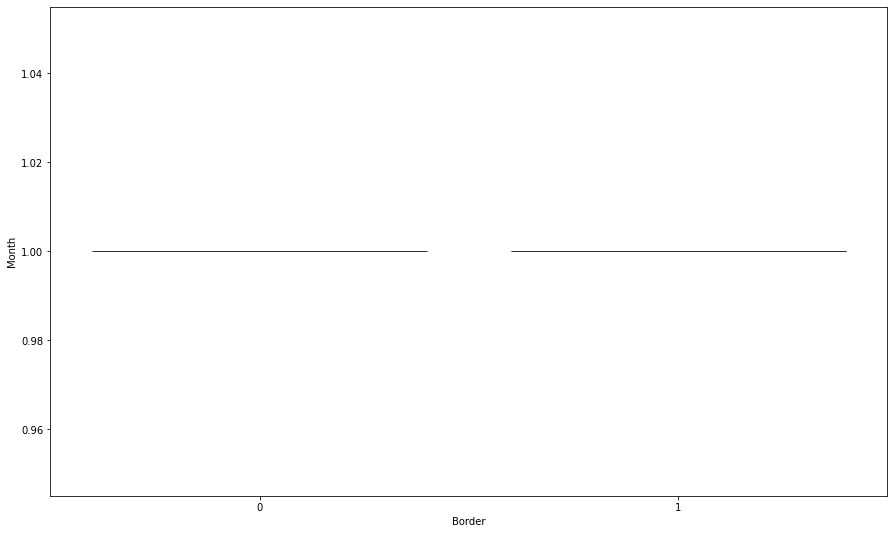

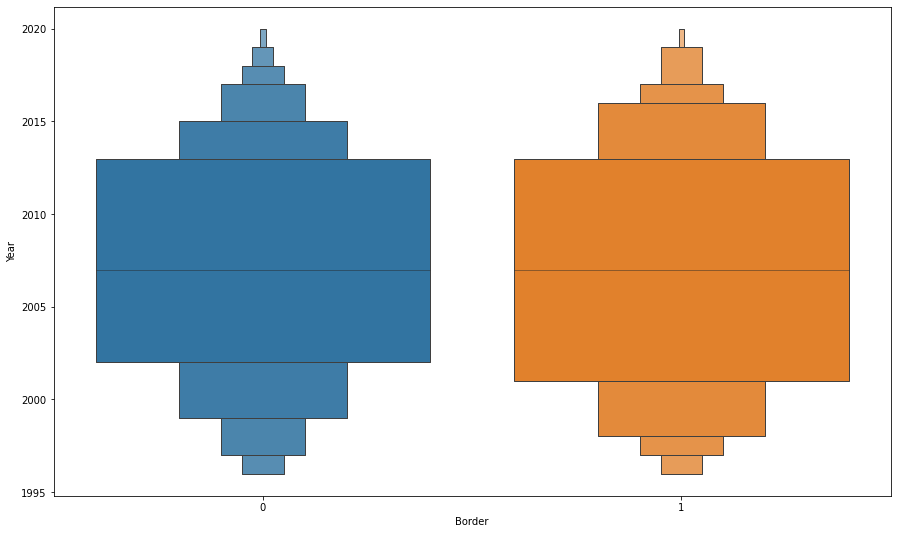

In [46]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

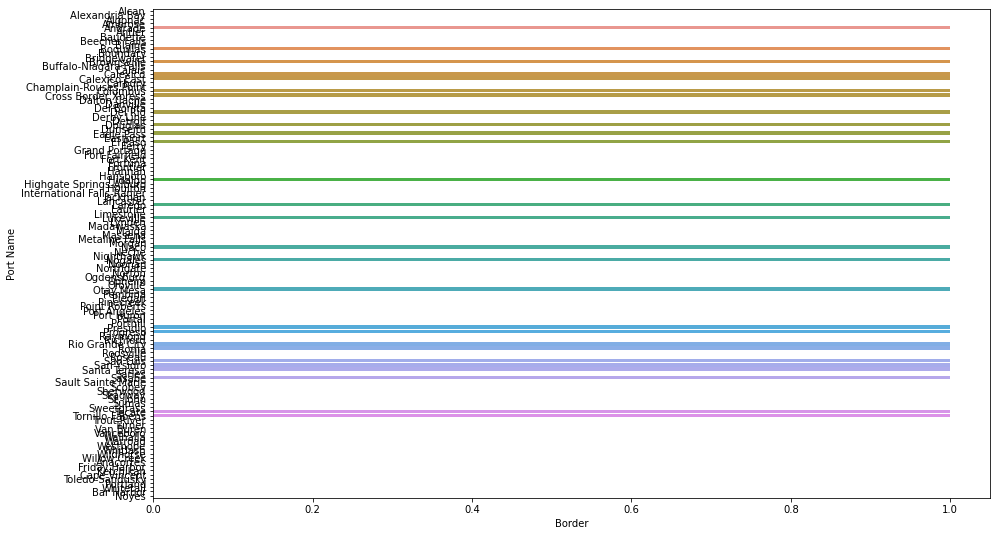

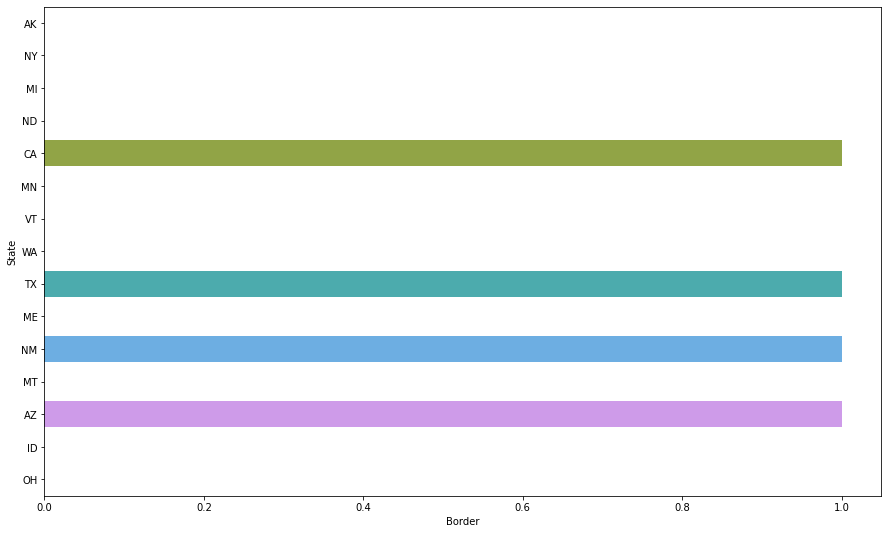

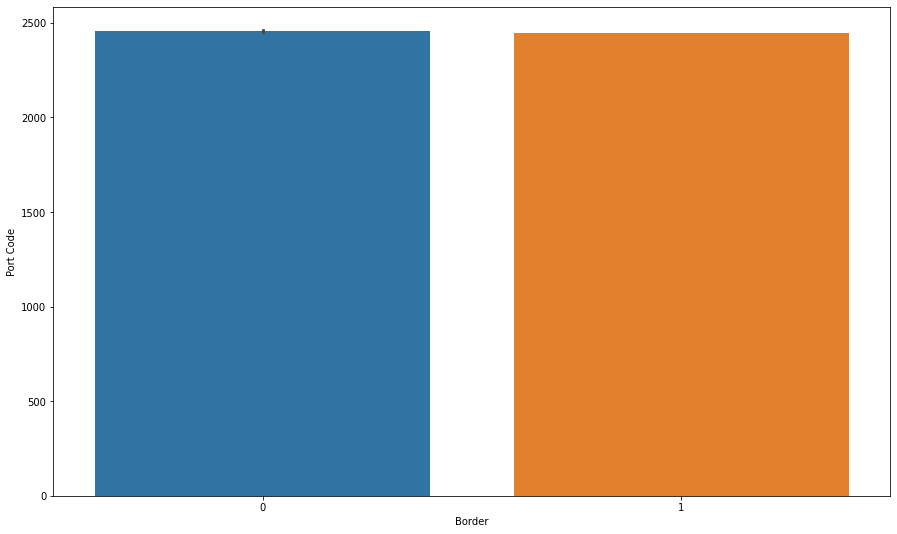

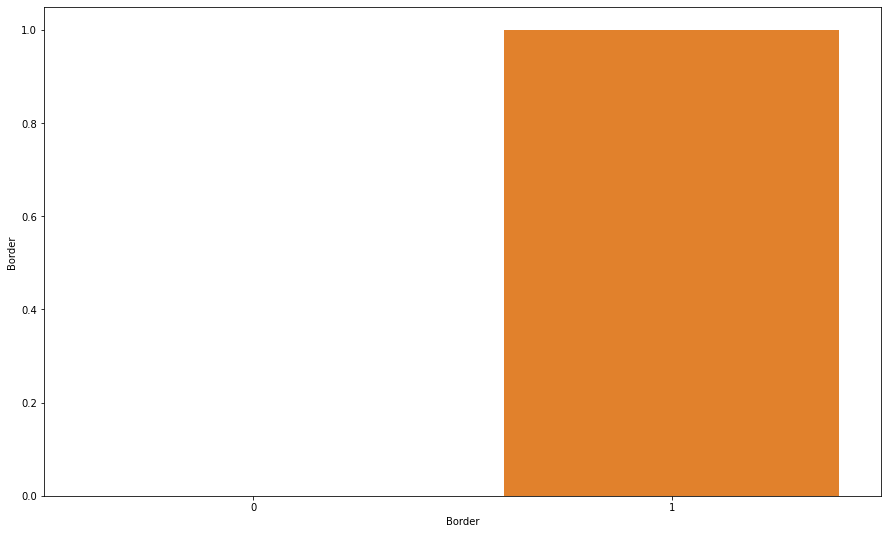

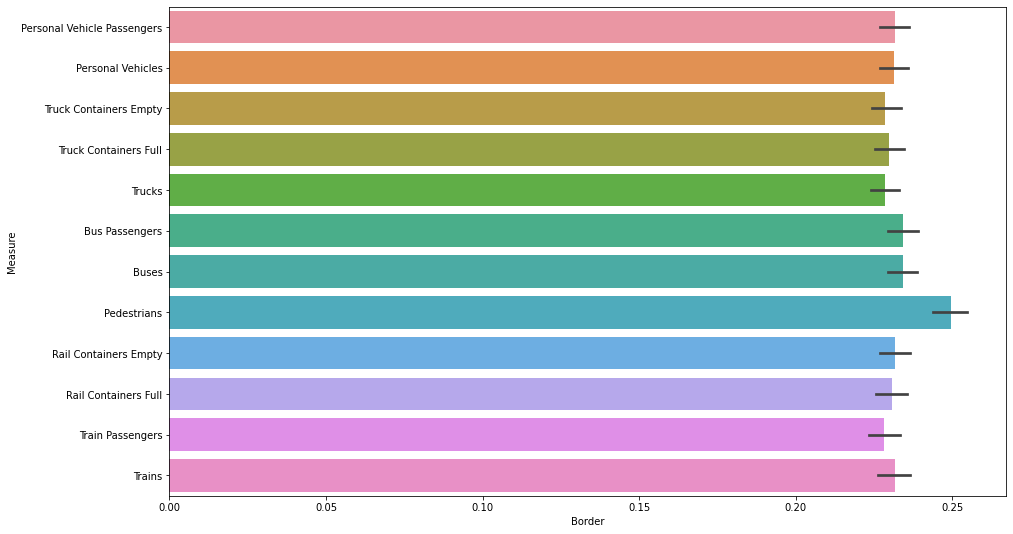

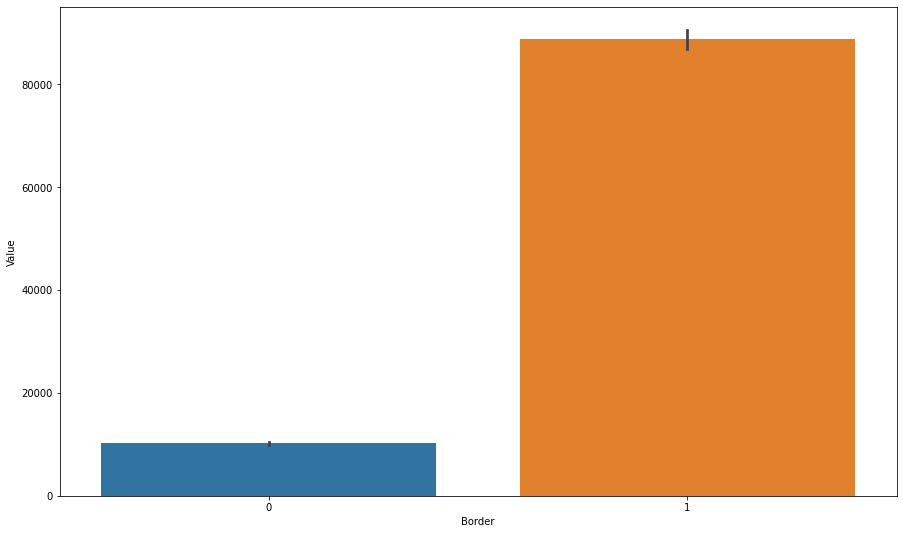

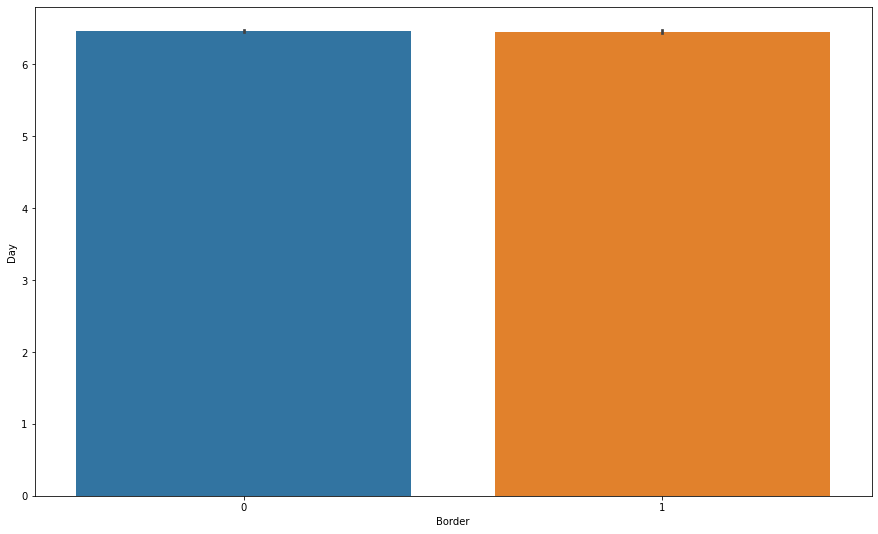

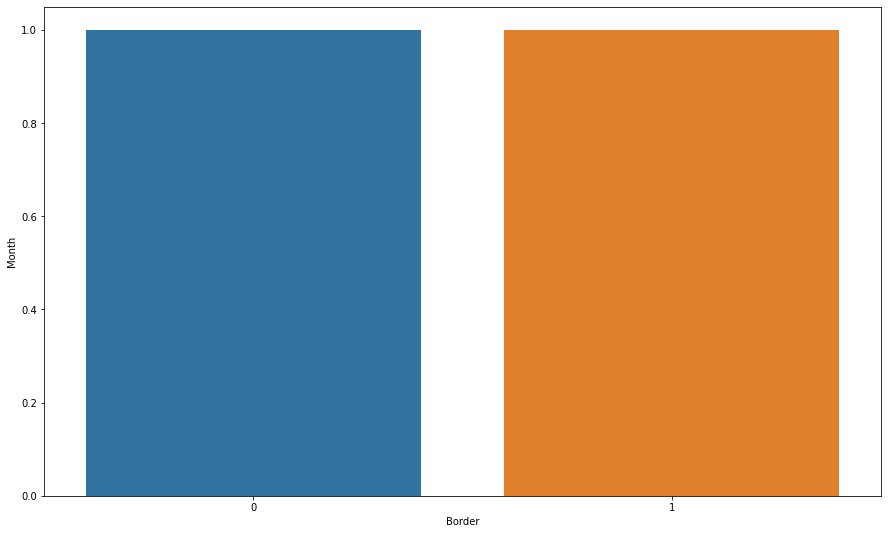

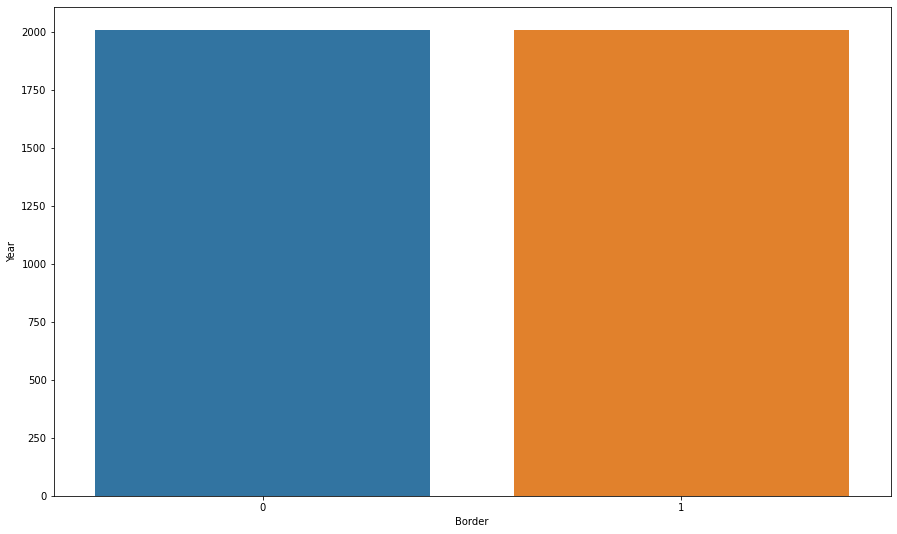

In [47]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.barplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

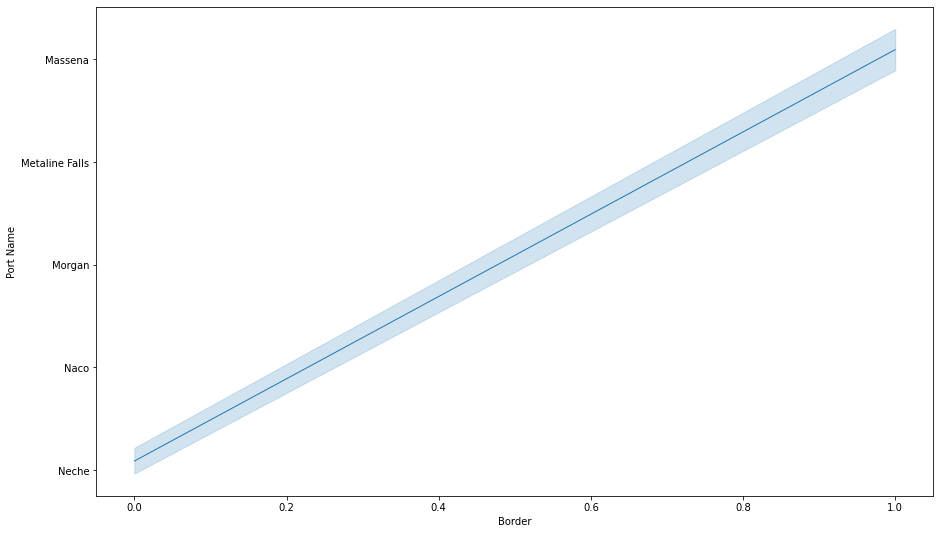

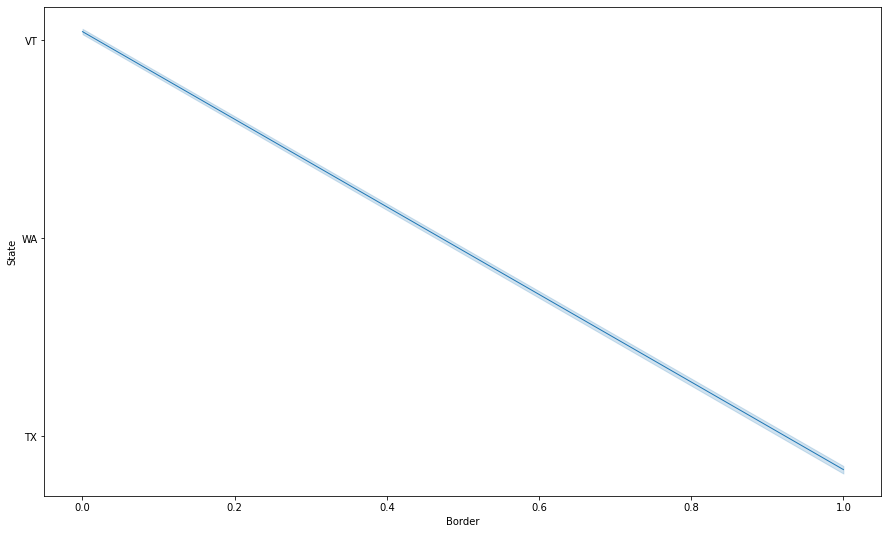

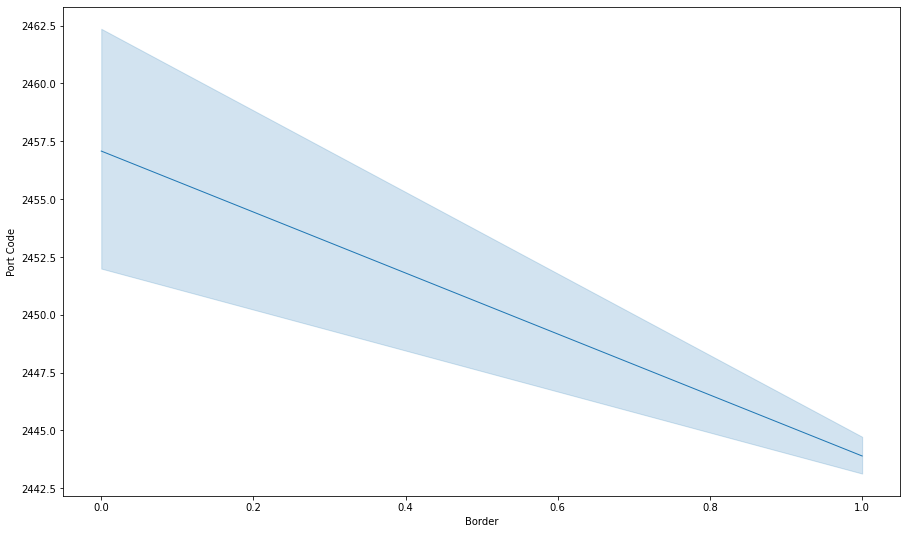

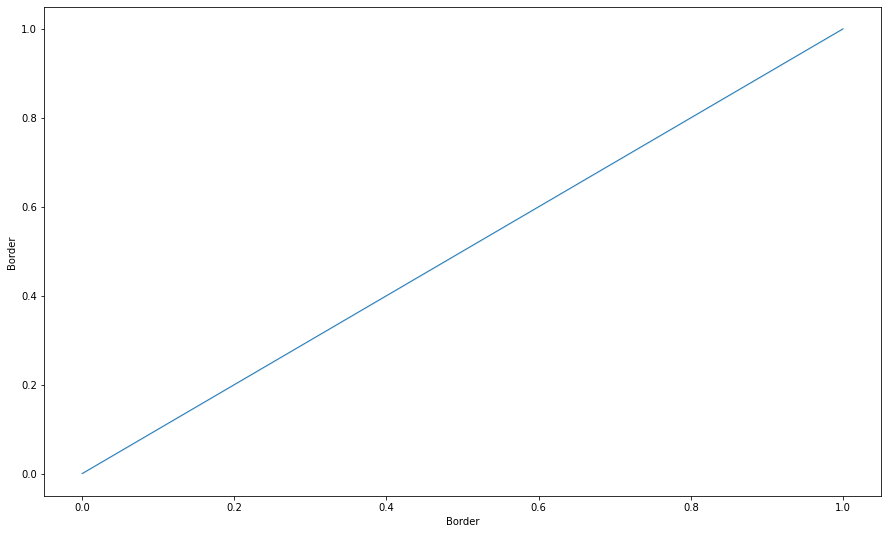

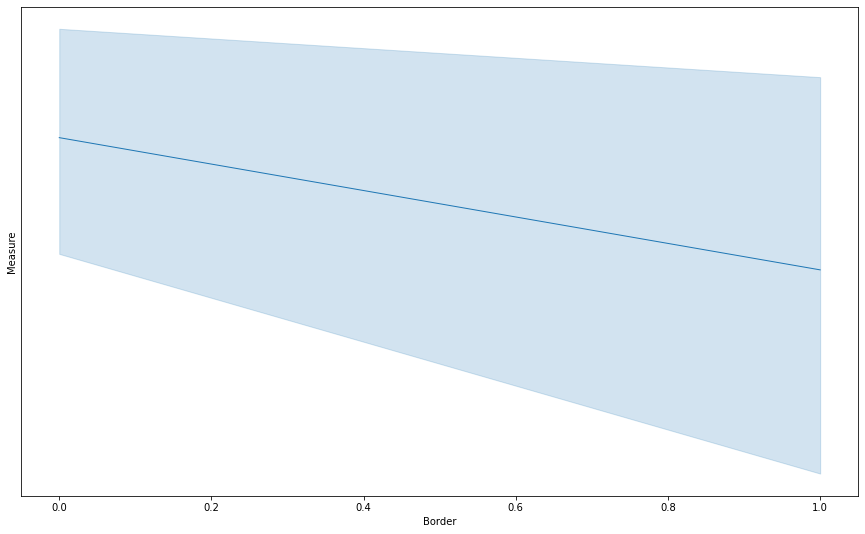

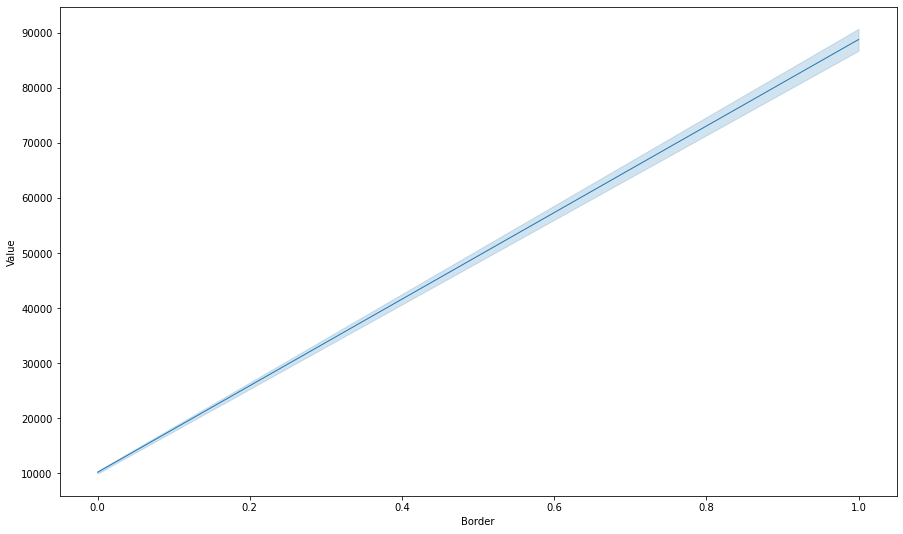

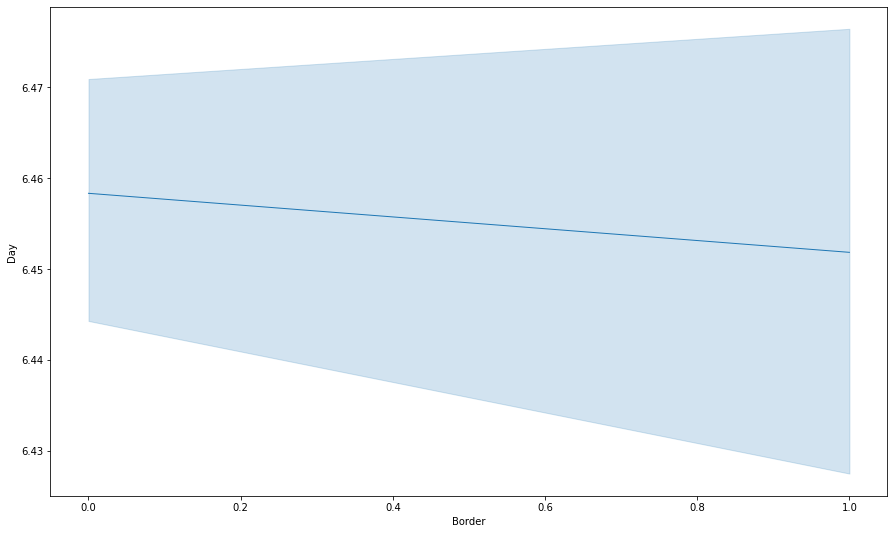

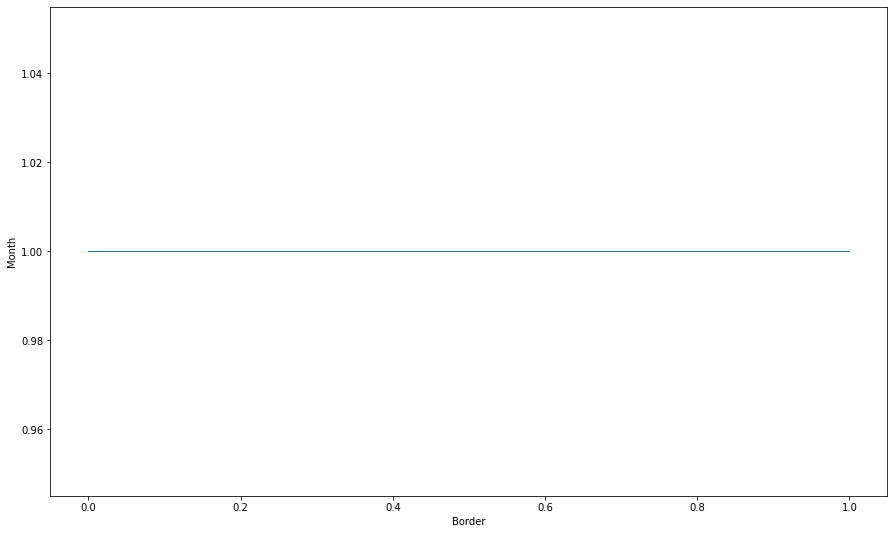

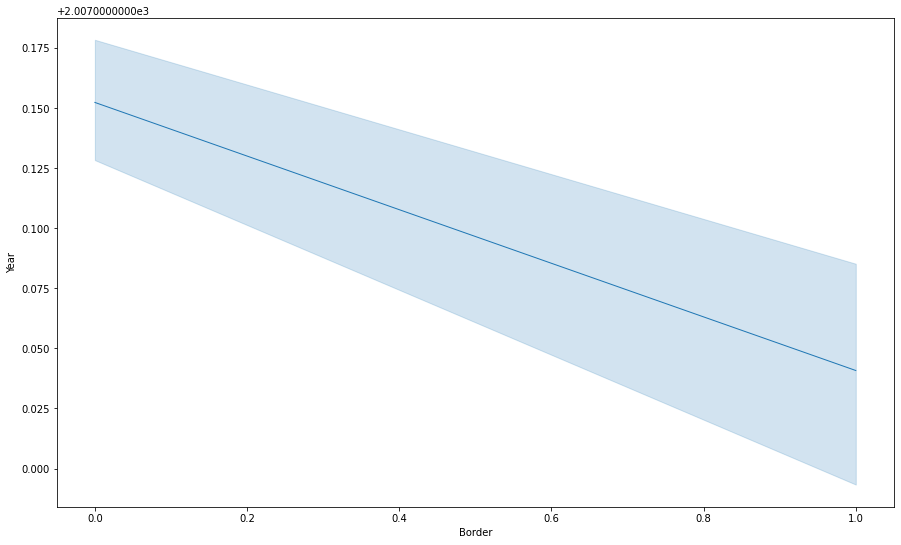

In [48]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

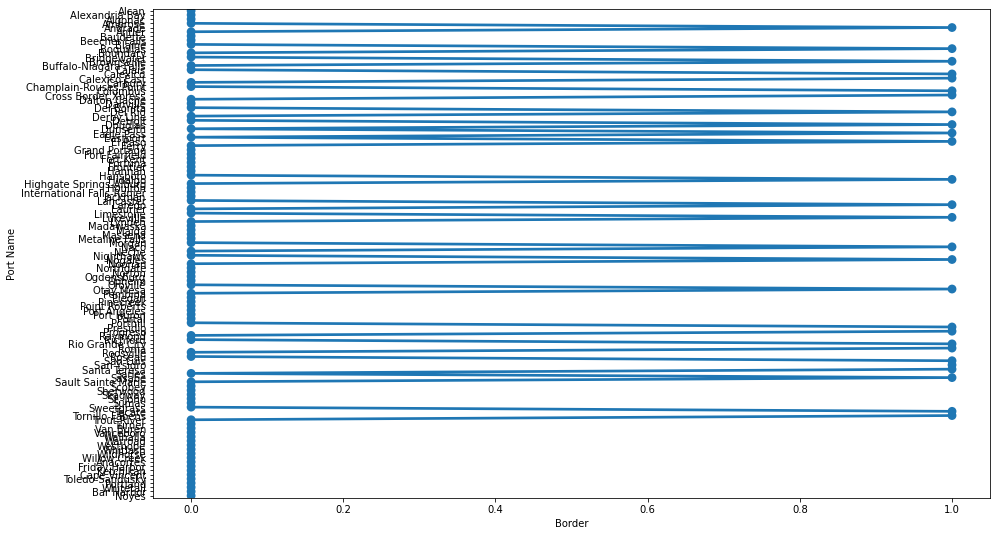

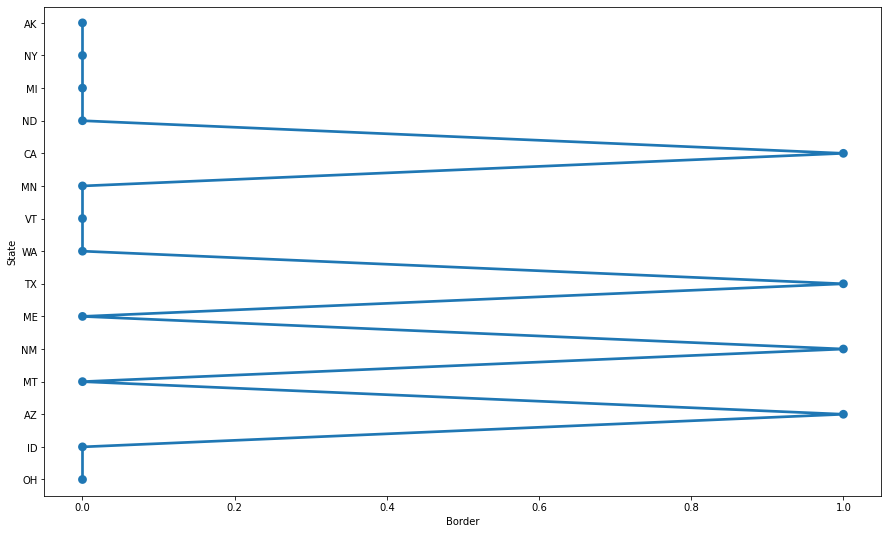

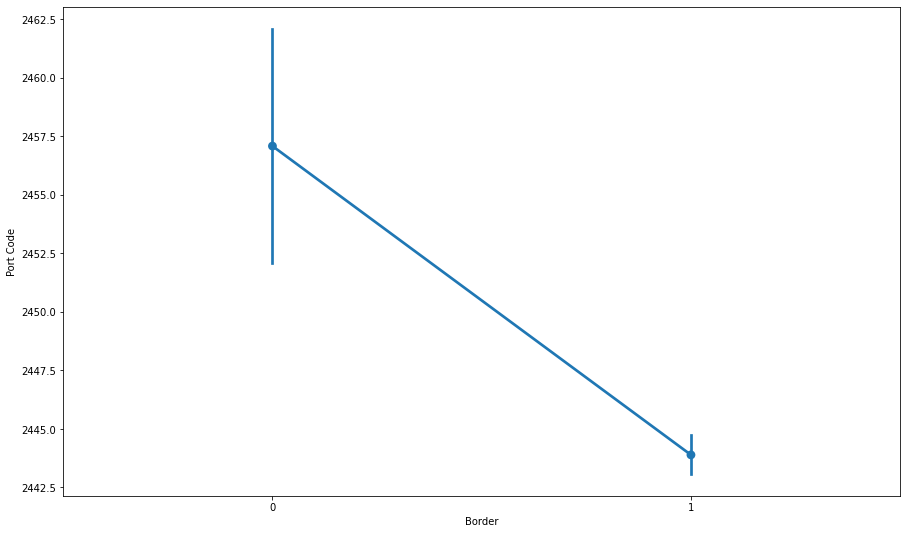

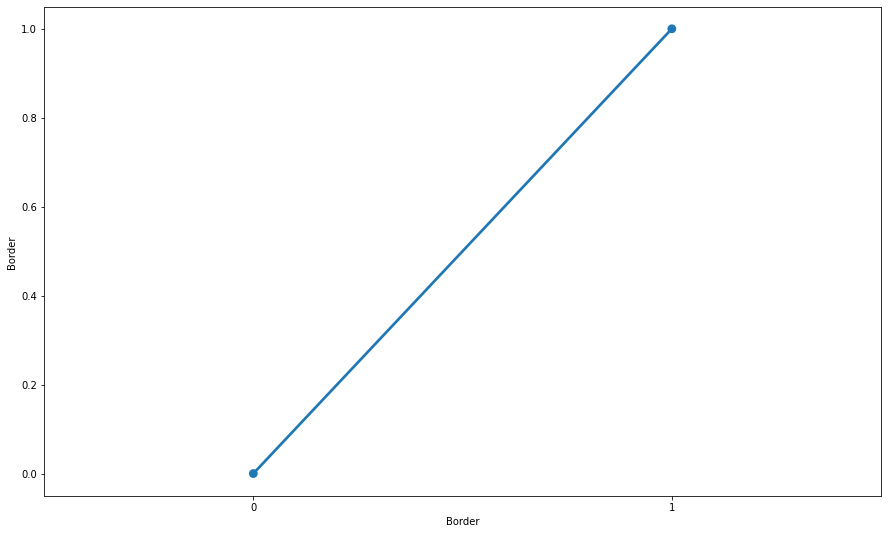

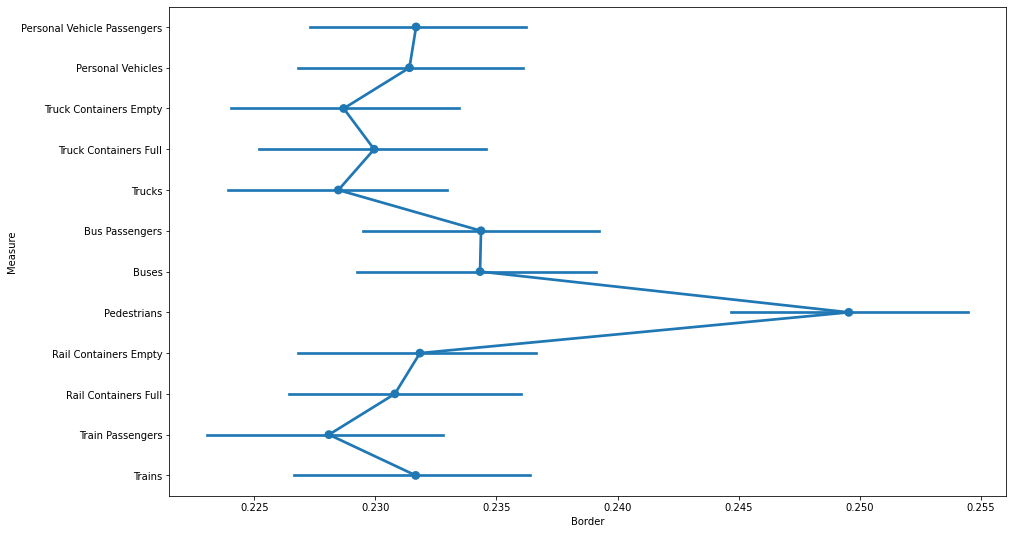

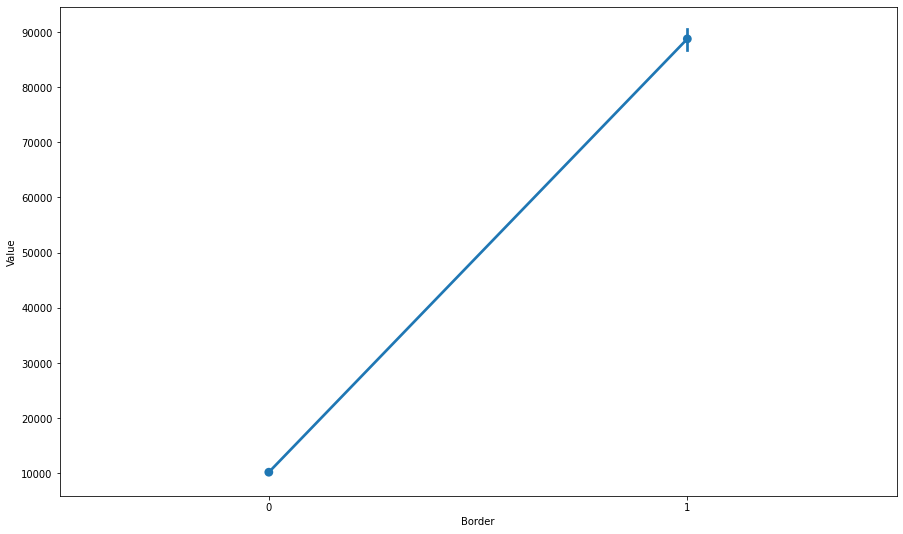

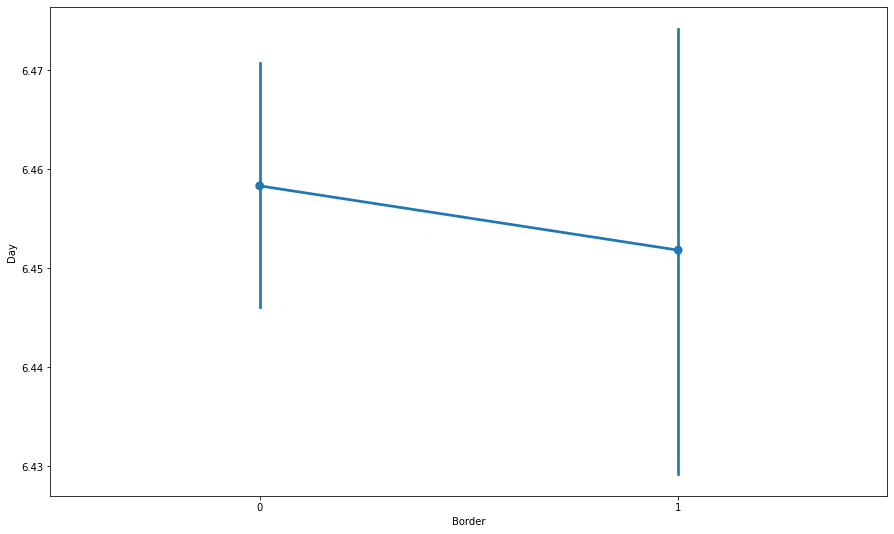

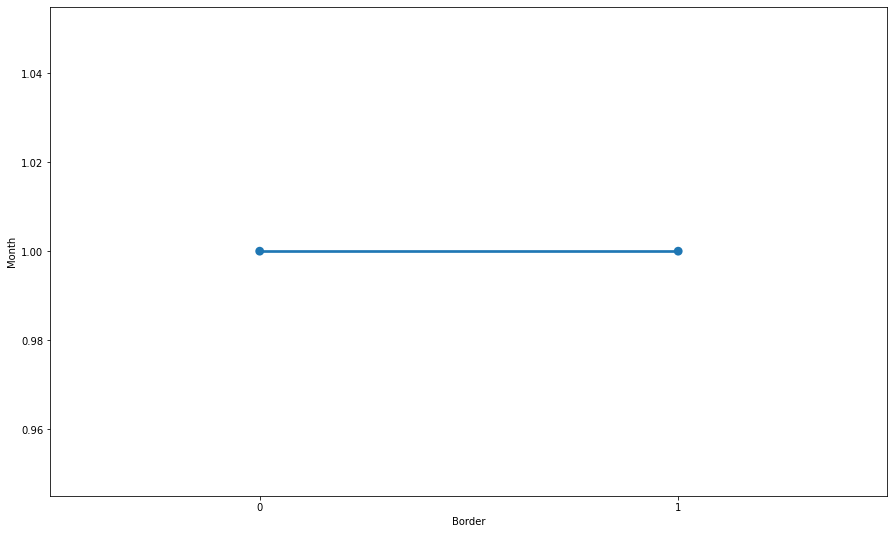

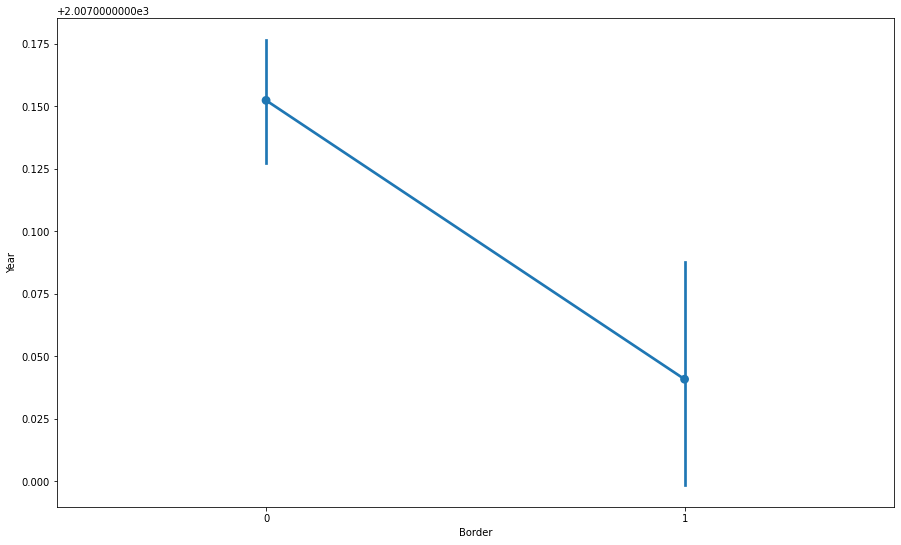

In [49]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.pointplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

<Figure size 1080x648 with 0 Axes>

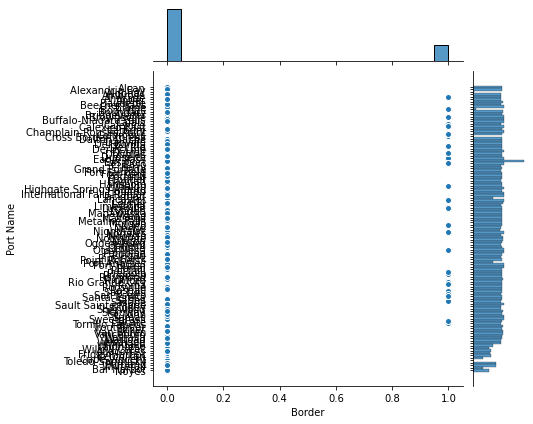

<Figure size 1080x648 with 0 Axes>

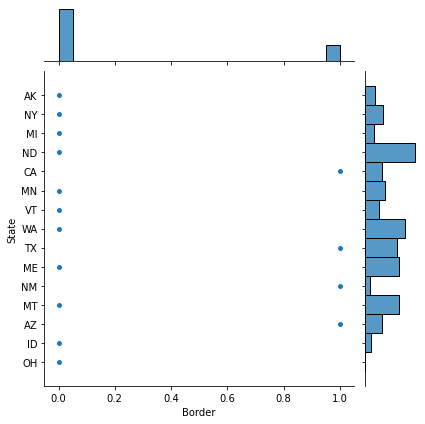

<Figure size 1080x648 with 0 Axes>

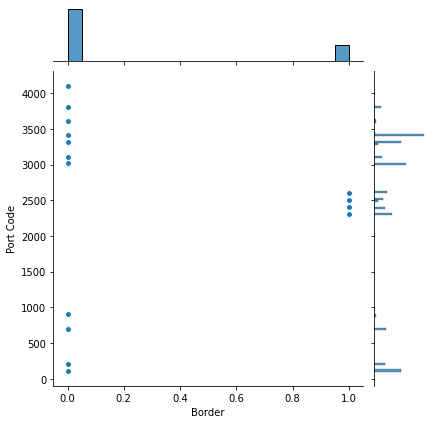

<Figure size 1080x648 with 0 Axes>

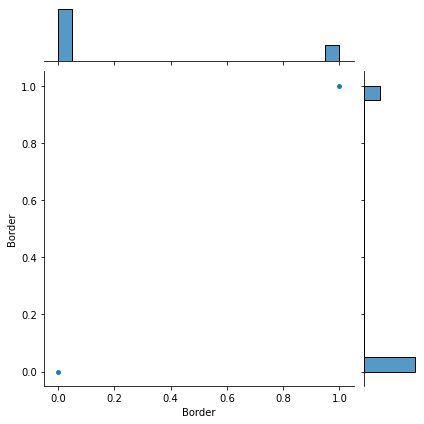

<Figure size 1080x648 with 0 Axes>

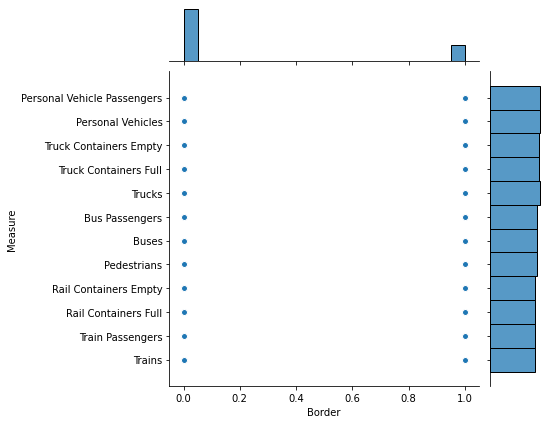

<Figure size 1080x648 with 0 Axes>

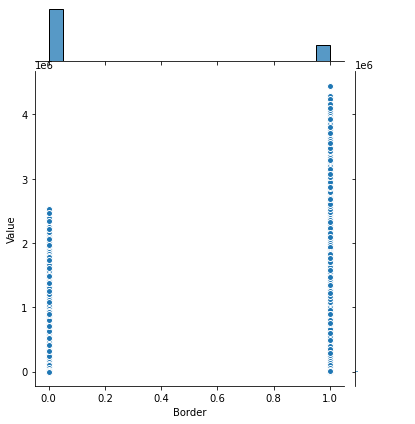

<Figure size 1080x648 with 0 Axes>

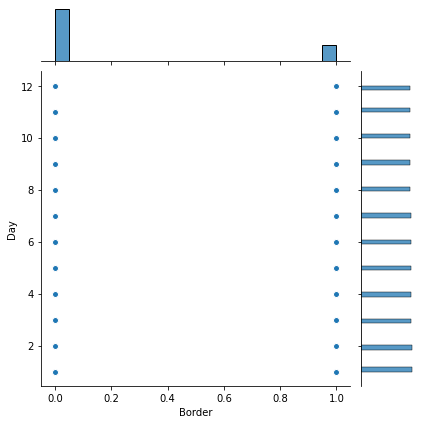

<Figure size 1080x648 with 0 Axes>

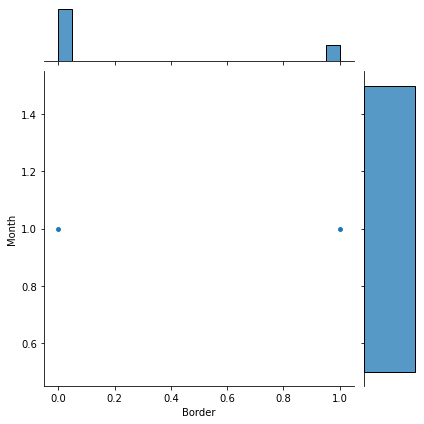

<Figure size 1080x648 with 0 Axes>

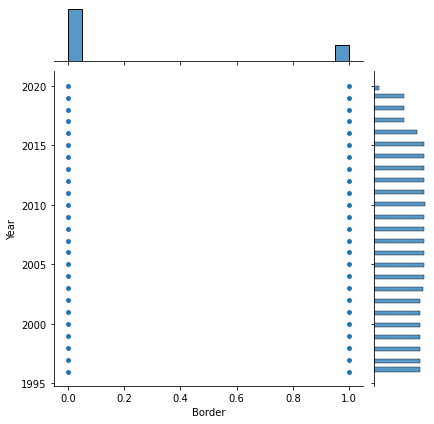

In [50]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

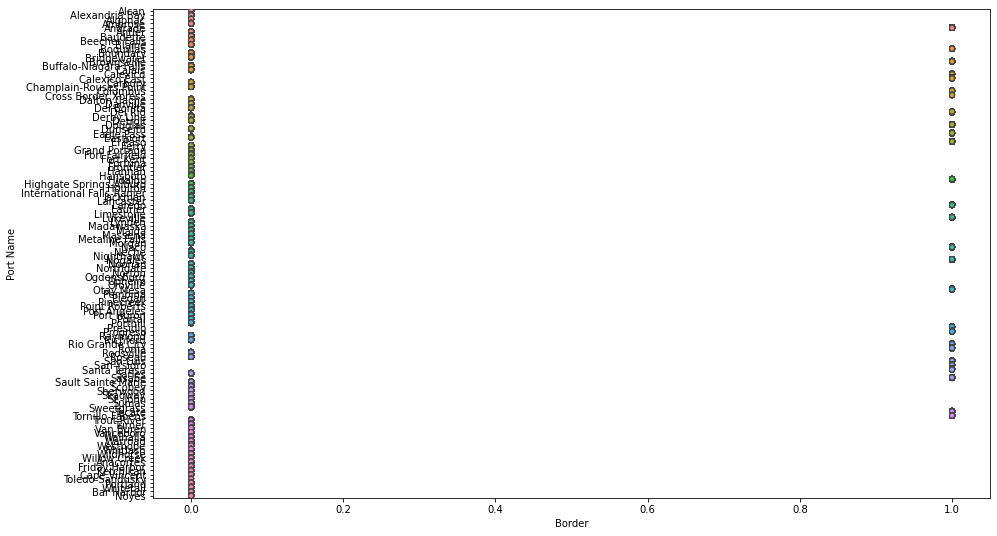

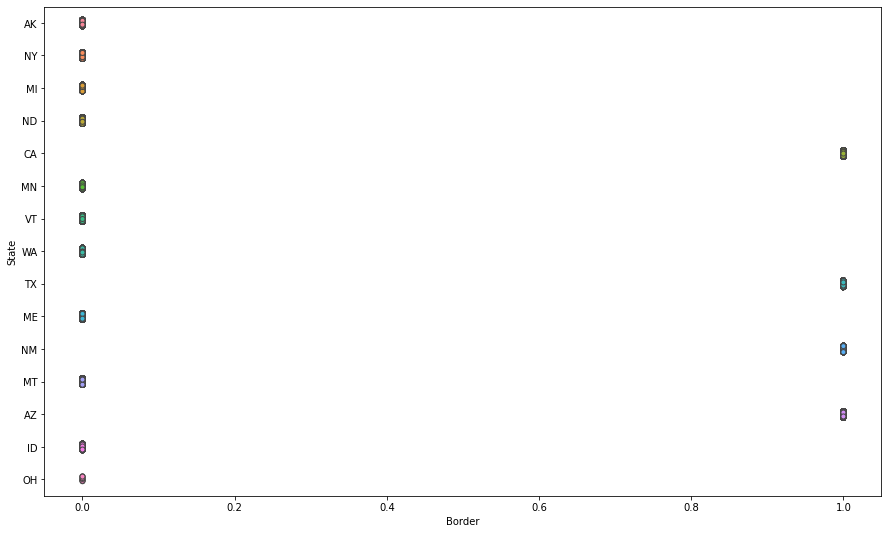

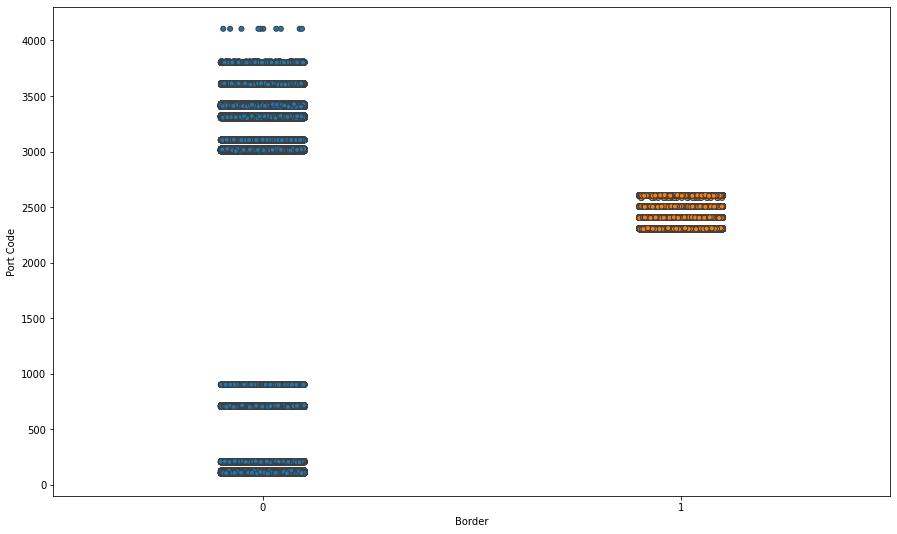

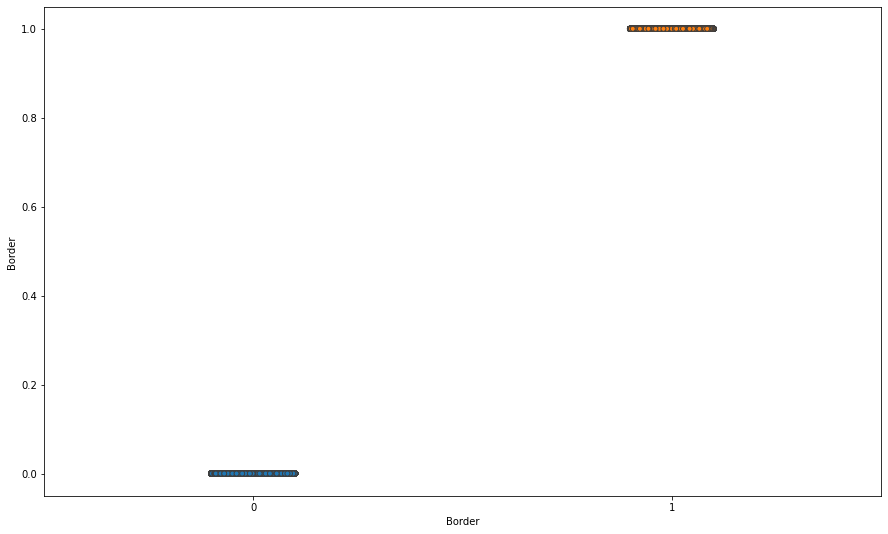

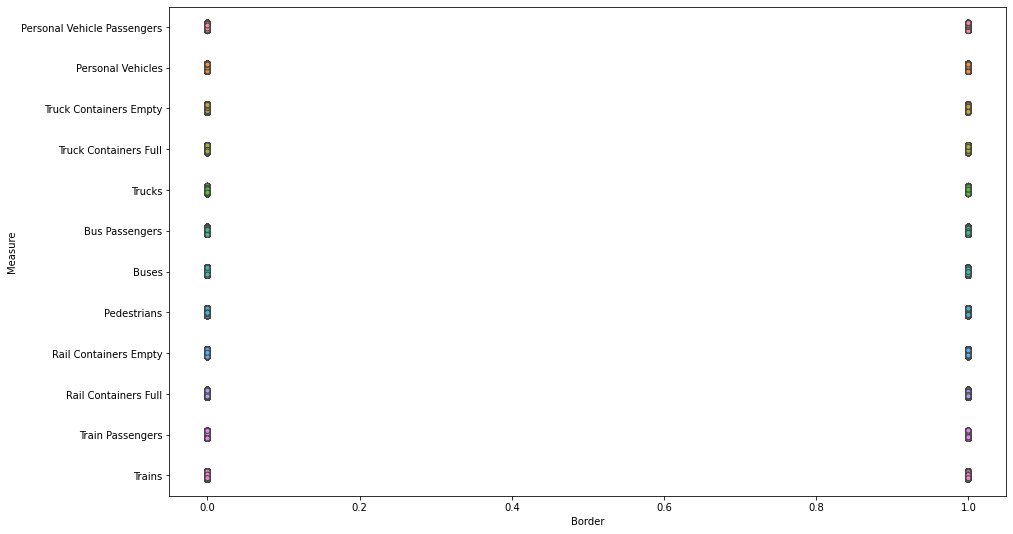

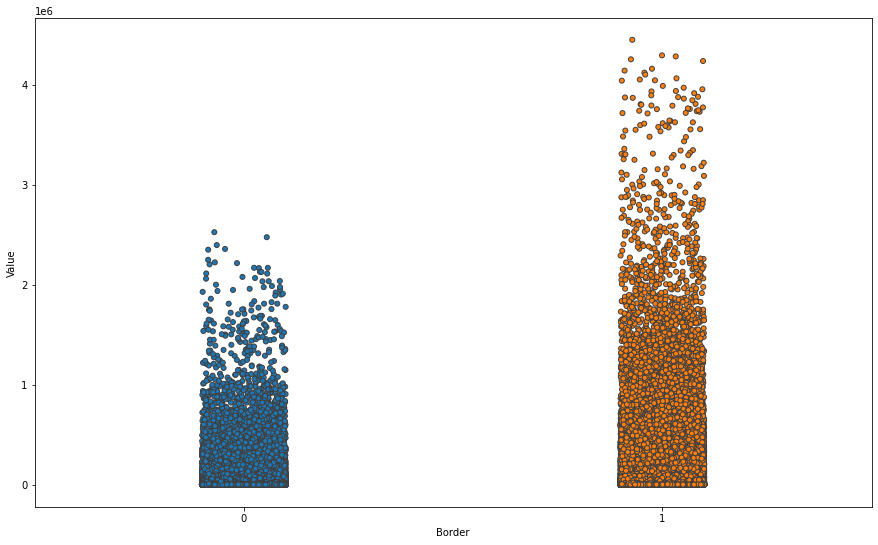

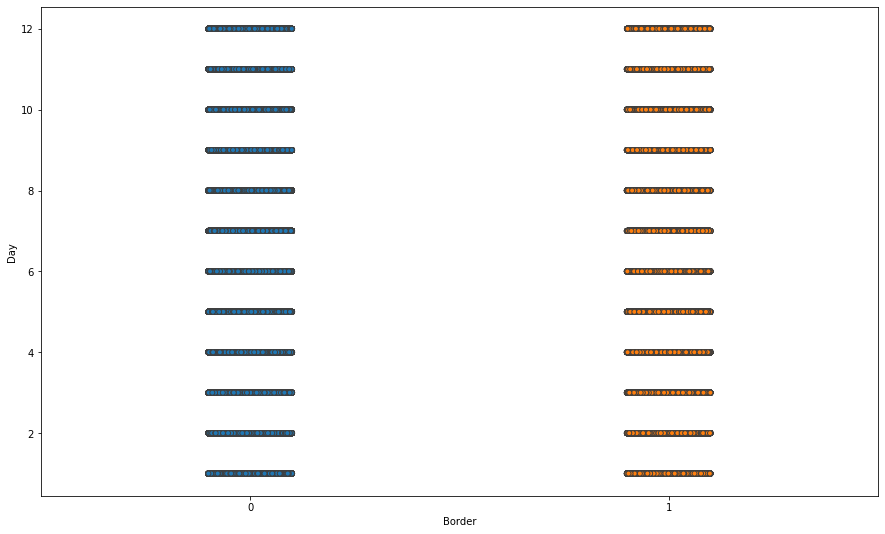

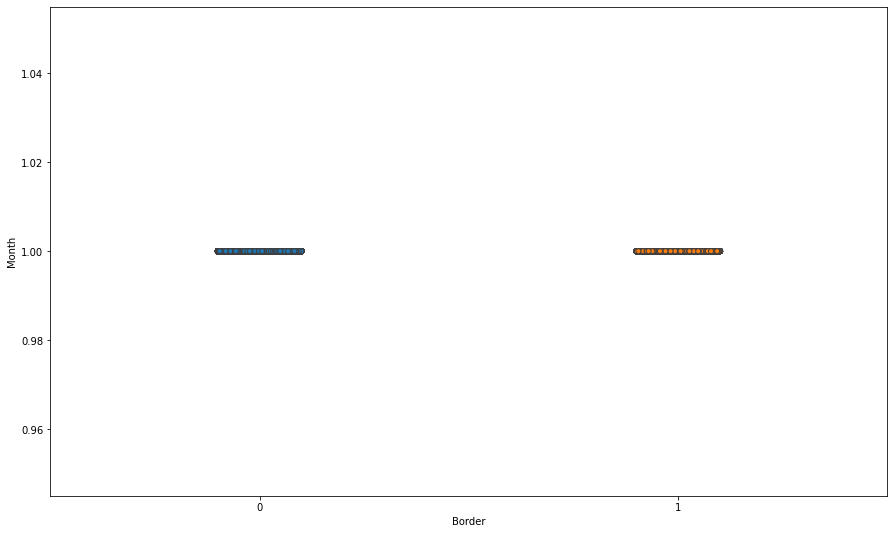

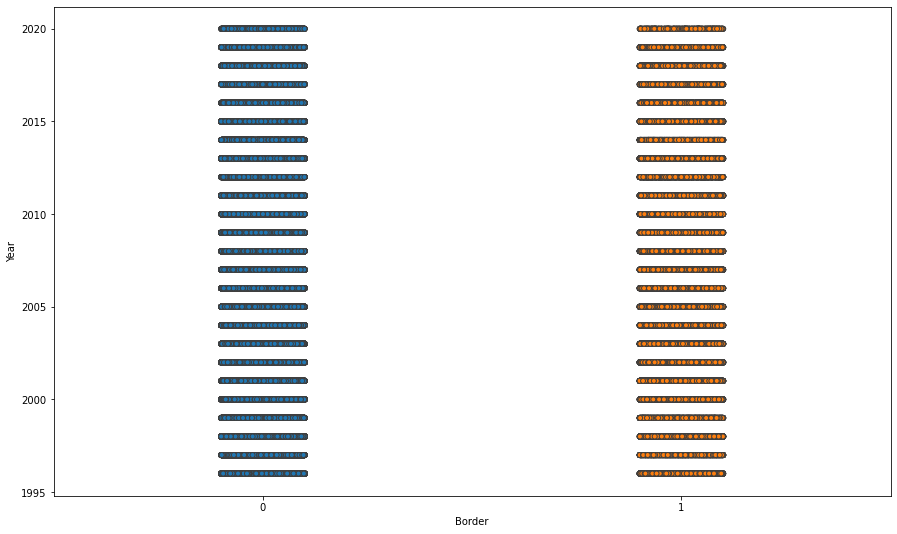

In [51]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.stripplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

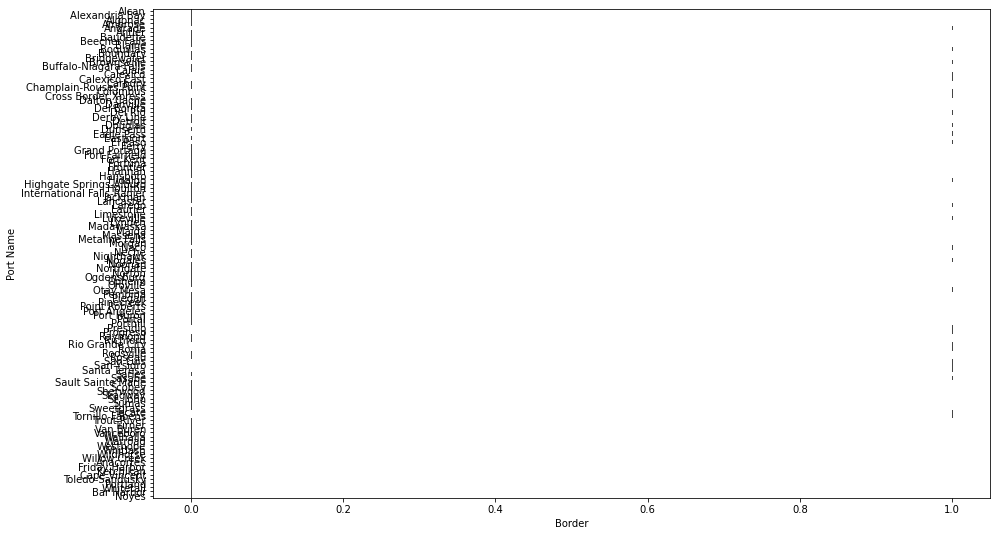

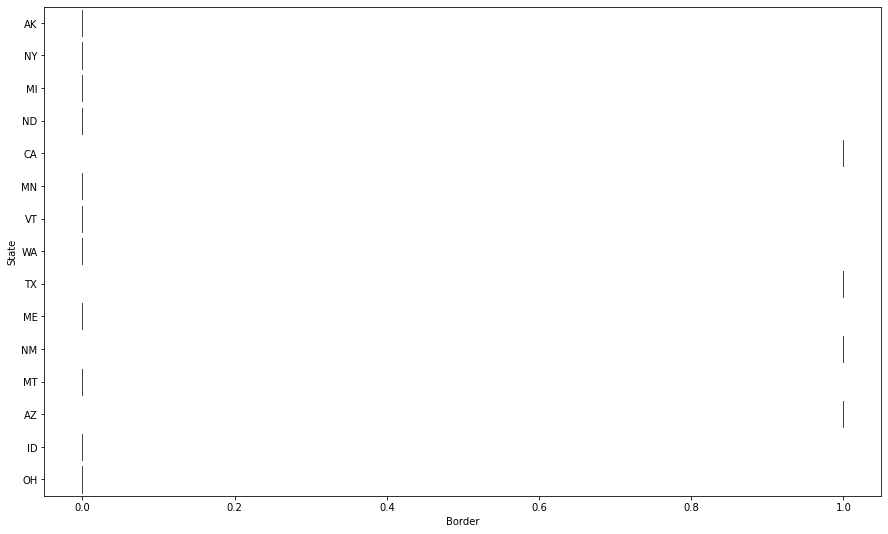

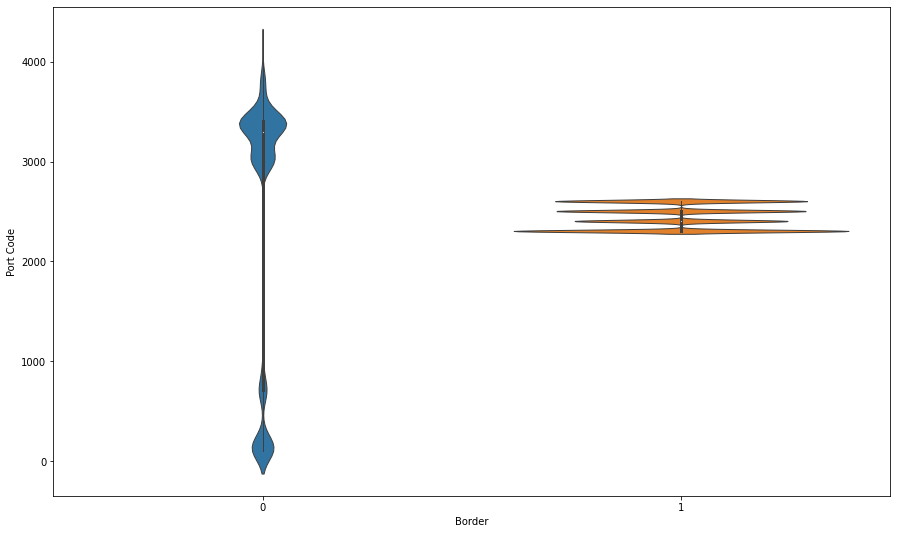

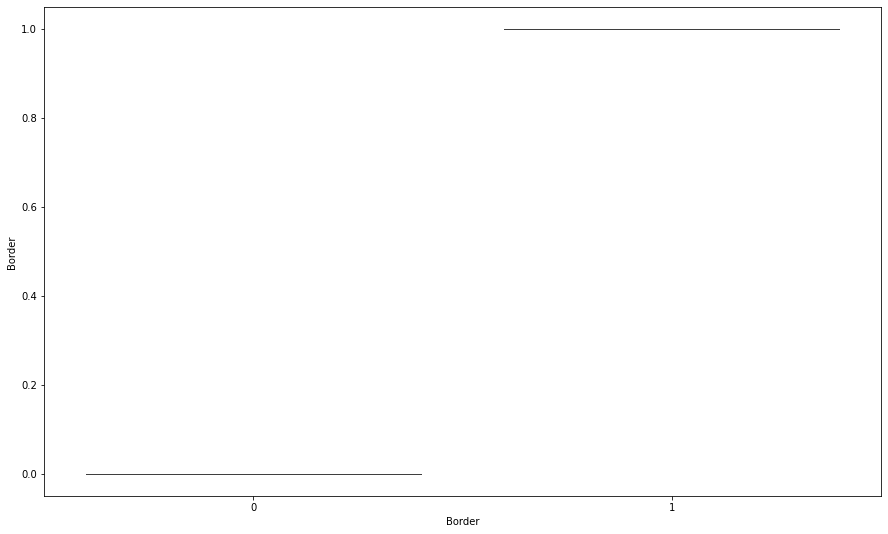

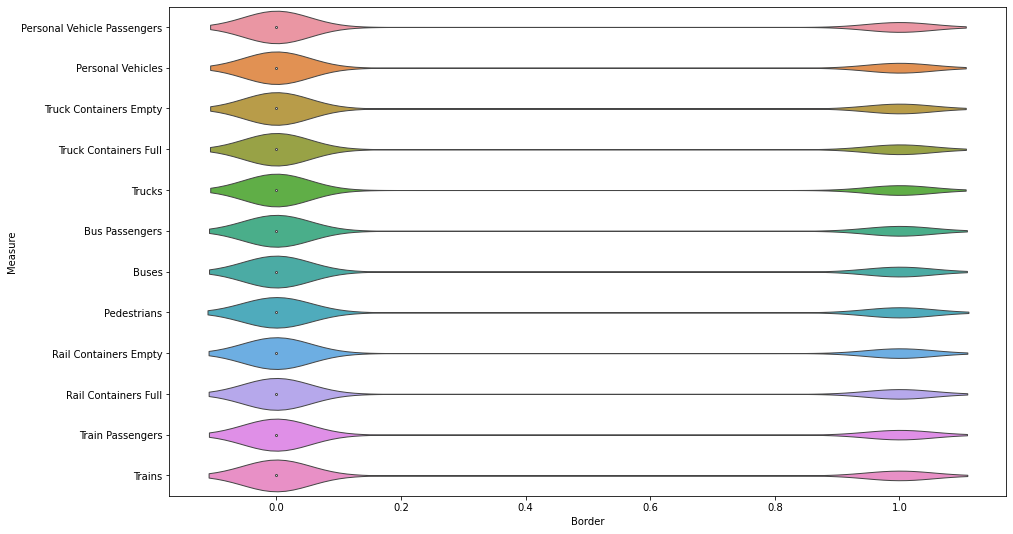

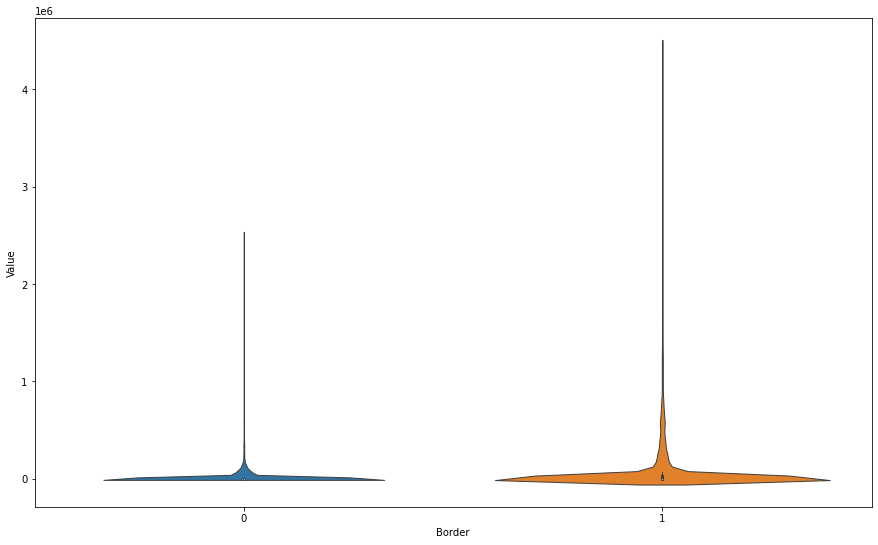

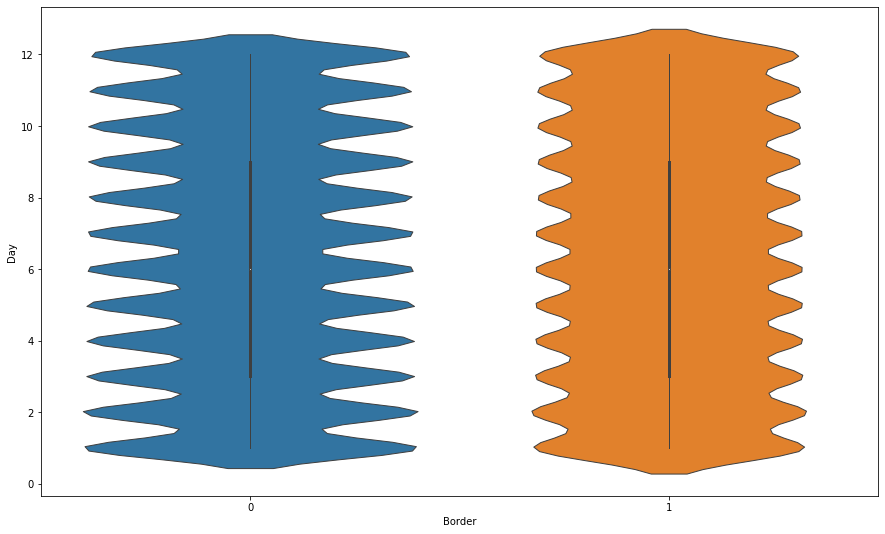

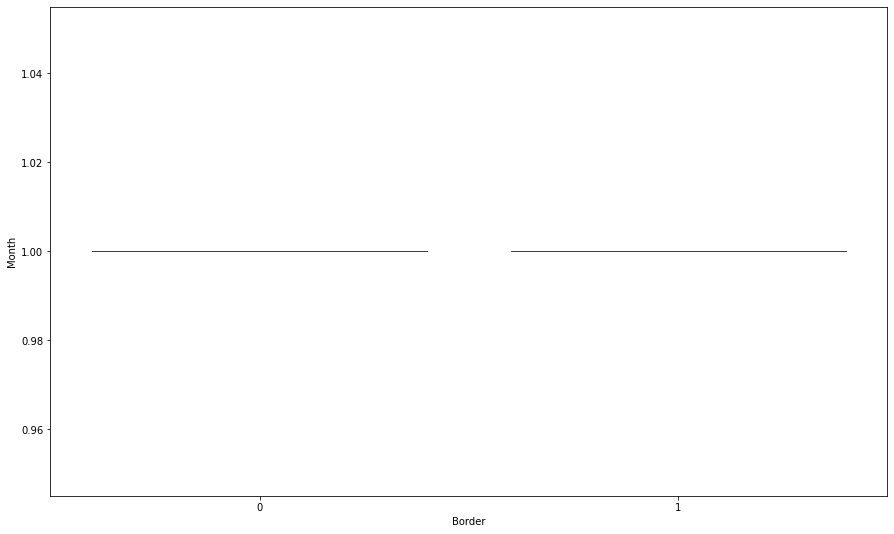

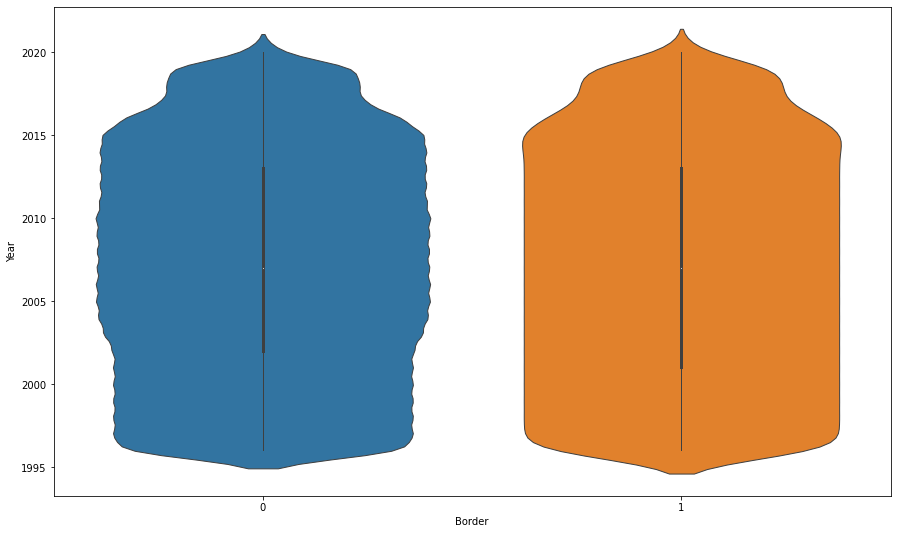

In [52]:
for i in ['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'Day',
       'Month', 'Year']:
    plt.figure(figsize=(15,9))
    sns.violinplot(x=df.Border,y=df[i],data=df,linewidth=1,)
    plt.show()

In [53]:
import sweetviz as sv
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
from IPython.display import IFrame

In [55]:
IFrame(src='Analyze.html',width=1000,height=600)